In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA

from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
csv_path = '/Users/mpillodi/documents/GitHub/wind-data-analysis/csvfolder/2013_03_02_0000.csv'

In [3]:
df = pd.read_csv(csv_path)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 44 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    144 non-null    object 
 1   time    144 non-null    object 
 2   period  144 non-null    int64  
 3   s1a     144 non-null    float64
 4   s1x     144 non-null    float64
 5   s1i     144 non-null    float64
 6   s1s     144 non-null    float64
 7   s2a     144 non-null    float64
 8   s2x     144 non-null    float64
 9   s2i     144 non-null    float64
 10  s2s     144 non-null    float64
 11  s3a     144 non-null    float64
 12  s3x     144 non-null    float64
 13  s3i     144 non-null    float64
 14  s3s     144 non-null    float64
 15  d1a     144 non-null    int64  
 16  d1s     144 non-null    int64  
 17  d2a     144 non-null    int64  
 18  d2s     144 non-null    int64  
 19  h1a     144 non-null    int64  
 20  h1x     144 non-null    int64  
 21  h1i     144 non-null    int64  
 22  t1

In [4]:
# Convert 'date' and 'time' columns to datetime format and set as index
df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['time'])
df.set_index('datetime', inplace=True)
df.sort_index(inplace=True)

In [5]:
df.head()

date      time  period      s1a     s1x     s1i  \
datetime                                                                     
2013-03-02 00:10:00  2013-03-02  00:10:00     600  6.30275  7.3814  4.9487   
2013-03-02 00:20:00  2013-03-02  00:20:00     600  5.83916  6.6929  4.9487   
2013-03-02 00:30:00  2013-03-02  00:30:00     600  5.36639  5.6831  4.9946   
2013-03-02 00:40:00  2013-03-02  00:40:00     600  5.76113  6.3257  5.2241   
2013-03-02 00:50:00  2013-03-02  00:50:00     600  5.60048  6.2339  5.1782   

                         s1s      s2a     s2x     s2i  ...  tii  vxa  vxx  \
datetime                                               ...                  
2013-03-02 00:10:00  0.33048  6.28339  7.2886  4.9936  ...   42  126  126   
2013-03-02 00:20:00  0.33966  5.83816  6.6001  4.9477  ...   42  126  126   
2013-03-02 00:30:00  0.12393  5.36998  5.7280  4.9477  ...   42  126  126   
2013-03-02 00:40:00  0.33048  5.71882  6.2788  5.2231  ...   42  126  126   
2013-03-02 00:50:00  0.19737  5.55358  6.1870  5.0854  ...   42  126  126   

                     vxi  bla  blx  bli  bra  brx  bri  
datetime                                                
2013-03-02 00:10:00  126   83   83   83   83   83   83  
2013-03-02 00:20:00  126   83   83   83   83   83   83  
2013-03-02 00:30:00  126   83   83   83   83   83   83  
2013-03-02 00:40:00  126   83   83   83   83   83   83  
2013-03-02 00:50:00  126   83   83   83   83   83   83  

[5 rows x 44 columns]


Analysis for column: s1a
Descriptive Statistics:
count    144.000000
mean       5.480279
std        2.084467
min        2.102900
25%        4.115615
50%        5.065745
75%        6.331437
max       11.067170
Name: s1a, dtype: float64


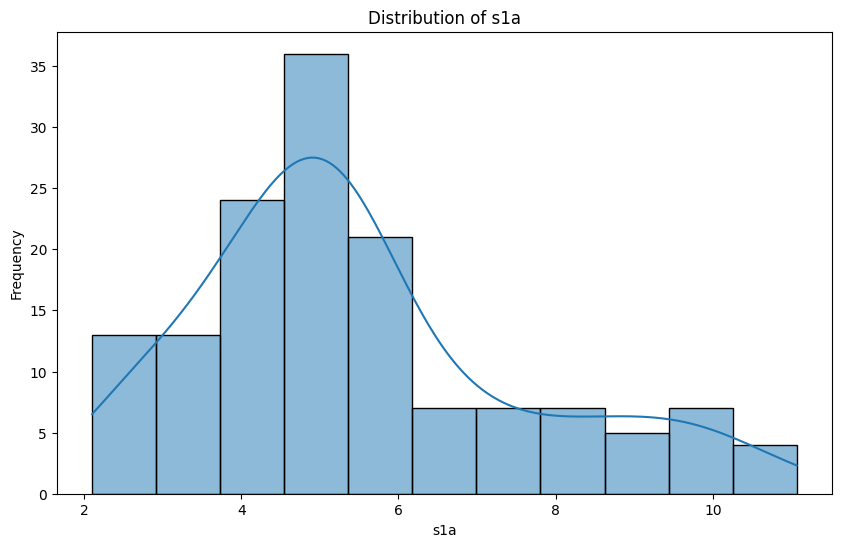


Analysis for column: s1x
Descriptive Statistics:
count    144.000000
mean       6.265137
std        2.038924
min        2.699600
25%        5.006075
50%        5.751950
75%        7.197800
max       11.741900
Name: s1x, dtype: float64


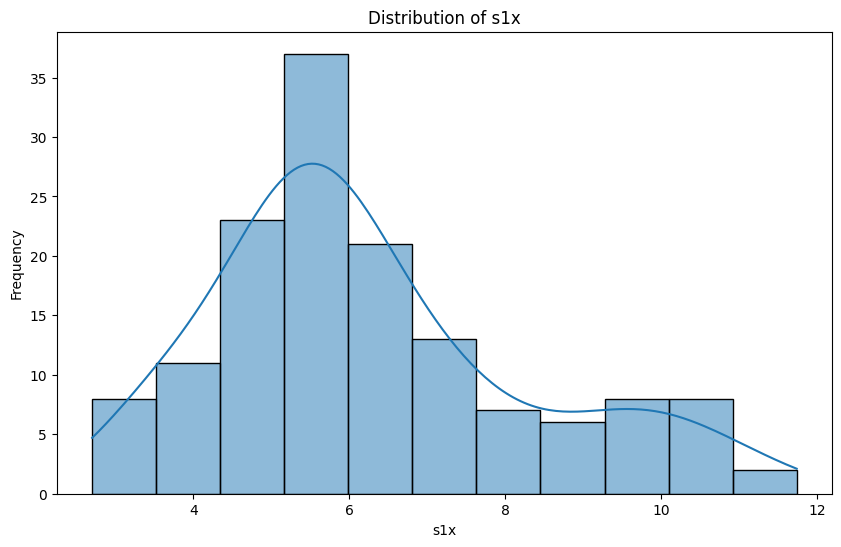


Analysis for column: s1i
Descriptive Statistics:
count    144.000000
mean       4.653219
std        2.198727
min        1.184900
25%        3.101225
50%        4.443800
75%        5.510975
max       10.456700
Name: s1i, dtype: float64


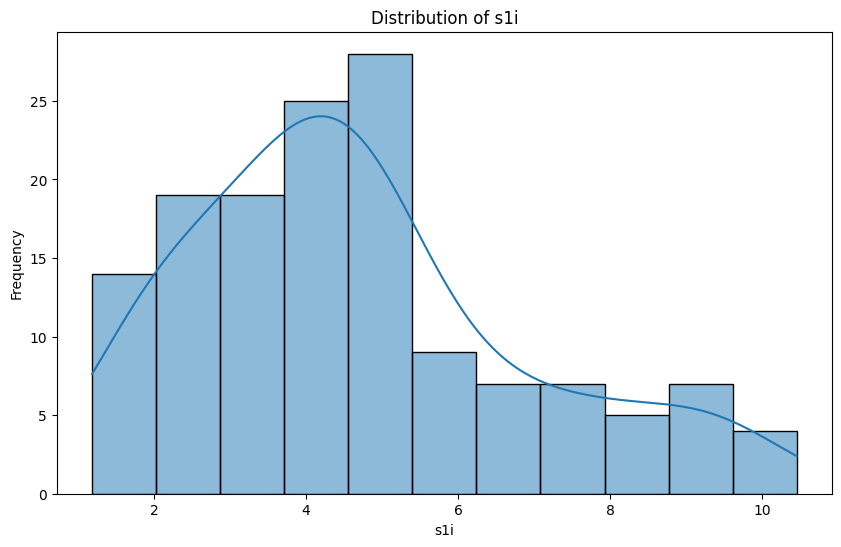


Analysis for column: s1s
Descriptive Statistics:
count    144.000000
mean       0.316933
std        0.190412
min        0.091800
25%        0.177863
50%        0.261630
75%        0.403920
max        1.124550
Name: s1s, dtype: float64


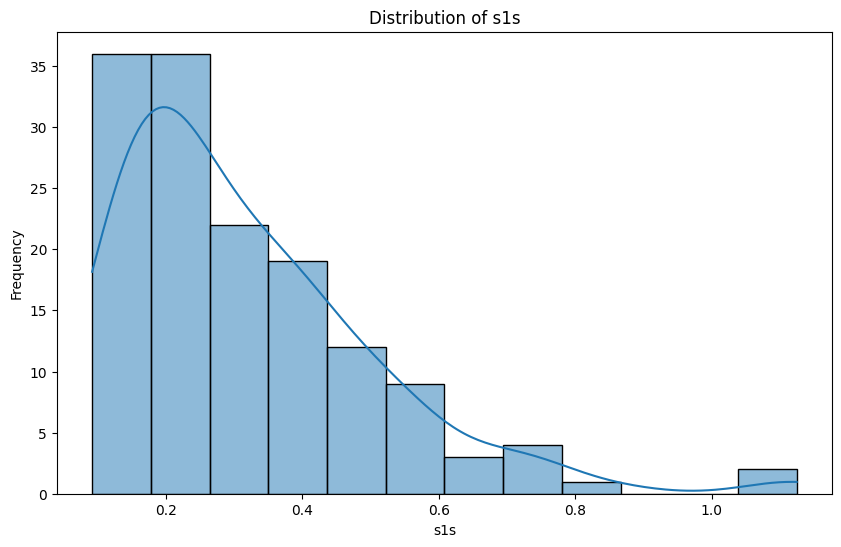


Analysis for column: s2a
Descriptive Statistics:
count    144.000000
mean       5.467741
std        2.070705
min        2.106490
25%        4.085927
50%        5.046385
75%        6.310930
max       10.923880
Name: s2a, dtype: float64


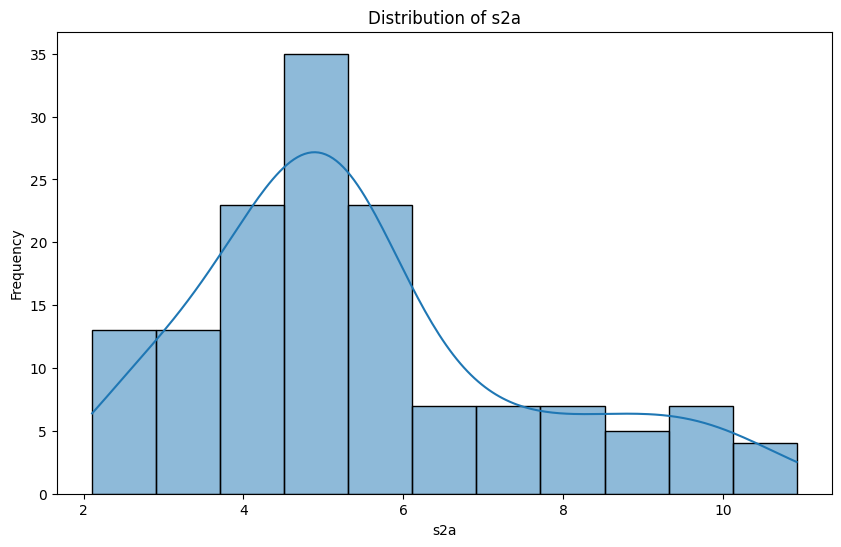


Analysis for column: s2x
Descriptive Statistics:
count    144.000000
mean       6.261269
std        2.024540
min        2.698600
25%        4.844425
50%        5.750950
75%        7.219750
max       11.603200
Name: s2x, dtype: float64


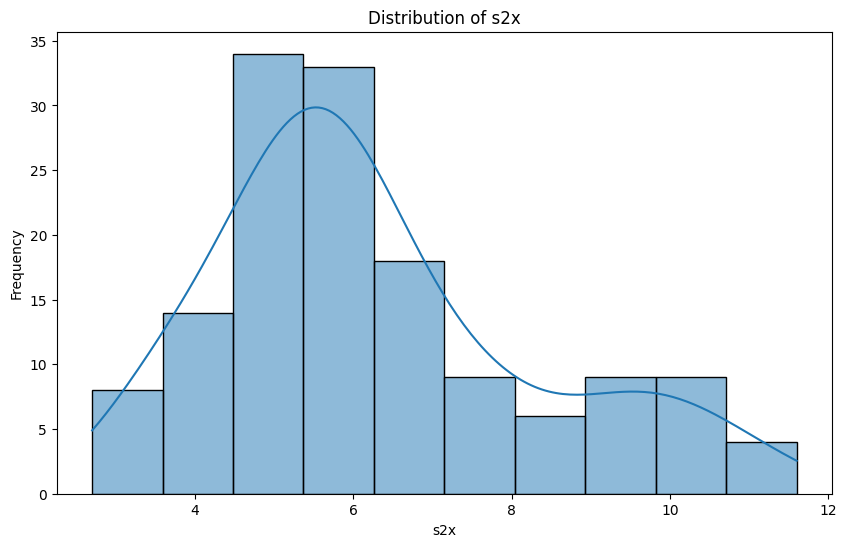


Analysis for column: s2i
Descriptive Statistics:
count    144.000000
mean       4.665606
std        2.174276
min        1.275700
25%        3.146125
50%        4.396900
75%        5.475550
max       10.318000
Name: s2i, dtype: float64


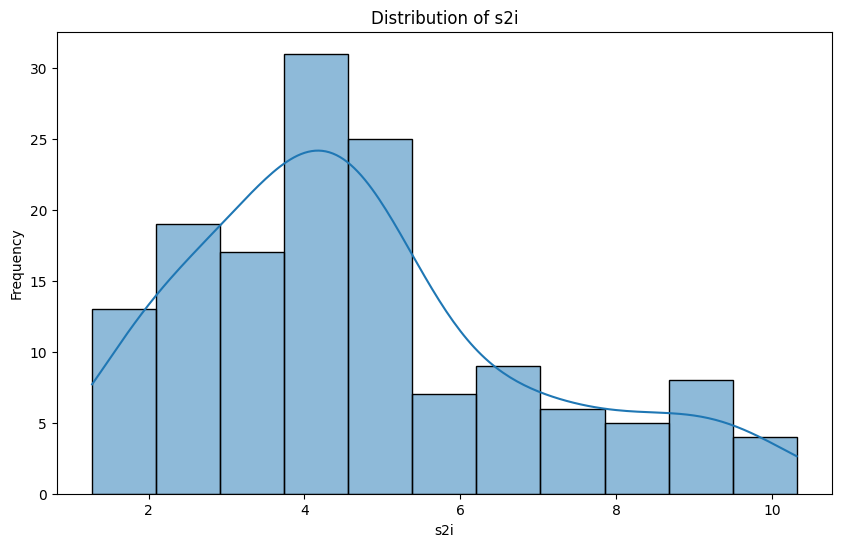


Analysis for column: s2s
Descriptive Statistics:
count    144.000000
mean       0.314606
std        0.188758
min        0.091800
25%        0.174420
50%        0.266220
75%        0.399330
max        1.119960
Name: s2s, dtype: float64


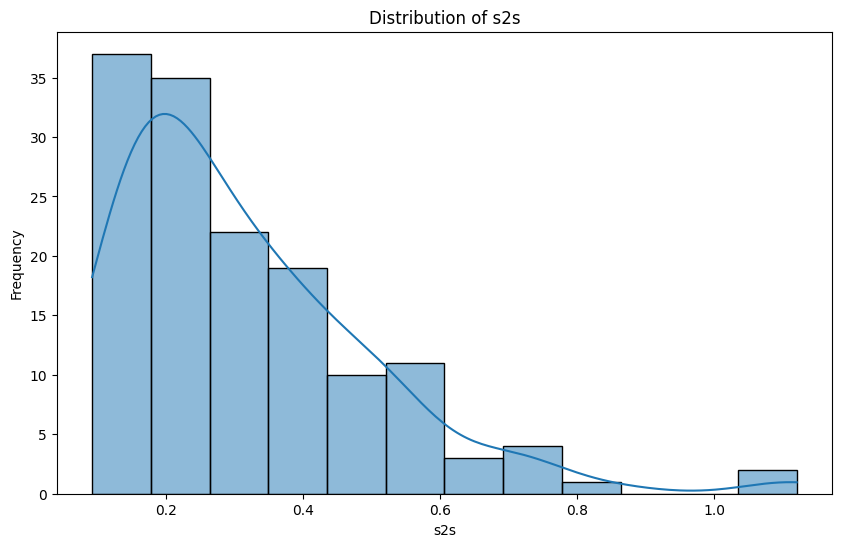


Analysis for column: s3a
Descriptive Statistics:
count    144.000000
mean       5.217765
std        1.926812
min        2.103670
25%        3.792833
50%        4.725140
75%        6.266370
max        9.699740
Name: s3a, dtype: float64


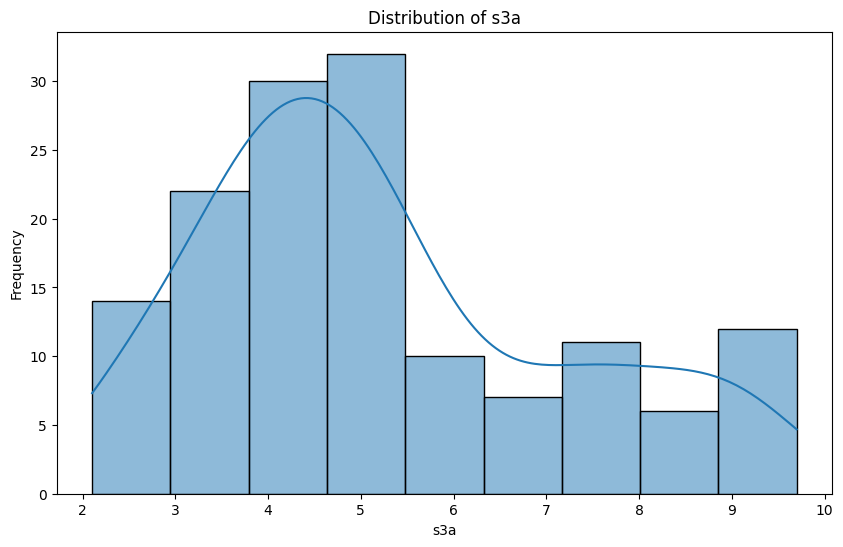


Analysis for column: s3x
Descriptive Statistics:
count    144.000000
mean       6.023644
std        1.924071
min        2.699980
25%        4.580650
50%        5.520985
75%        7.344317
max       10.497880
Name: s3x, dtype: float64


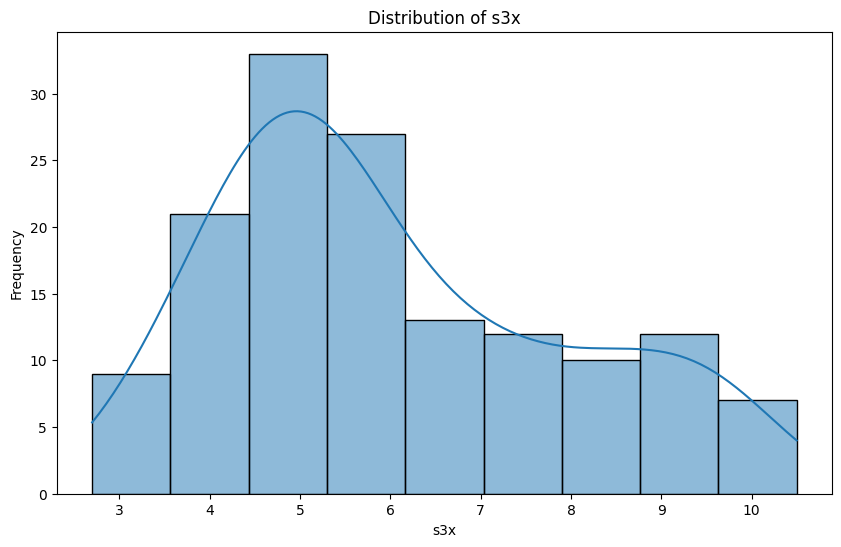


Analysis for column: s3i
Descriptive Statistics:
count    144.000000
mean       4.408000
std        1.984514
min        1.278010
25%        2.952265
50%        4.076080
75%        5.715933
max        8.984170
Name: s3i, dtype: float64


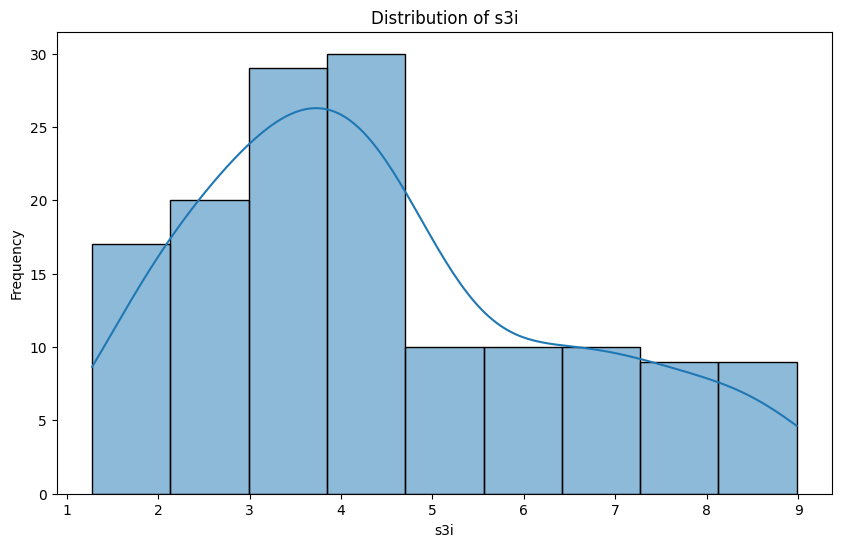


Analysis for column: s3s
Descriptive Statistics:
count    144.000000
mean       0.318542
std        0.189438
min        0.068810
25%        0.178890
50%        0.282100
75%        0.433473
max        1.082530
Name: s3s, dtype: float64


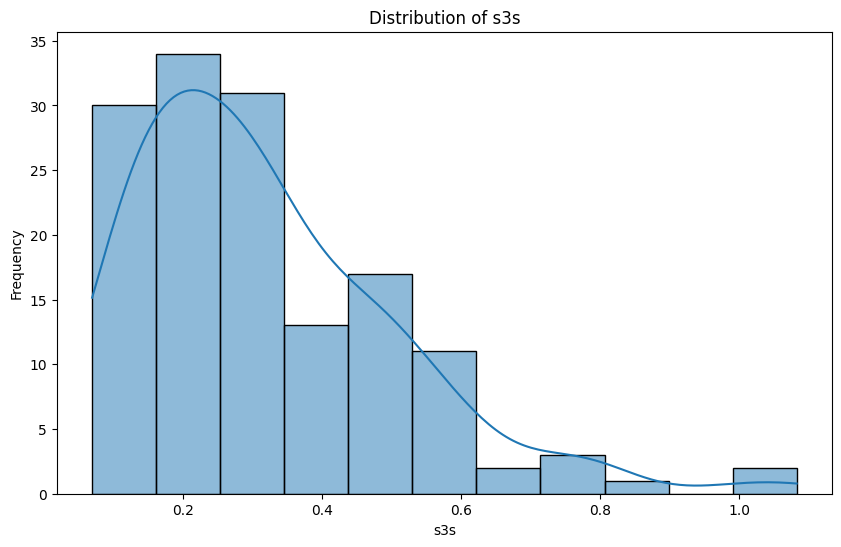


Analysis for column: d1a
Descriptive Statistics:
count    144.000000
mean     103.652778
std       22.863939
min       50.000000
25%       90.000000
50%      109.500000
75%      119.500000
max      141.000000
Name: d1a, dtype: float64


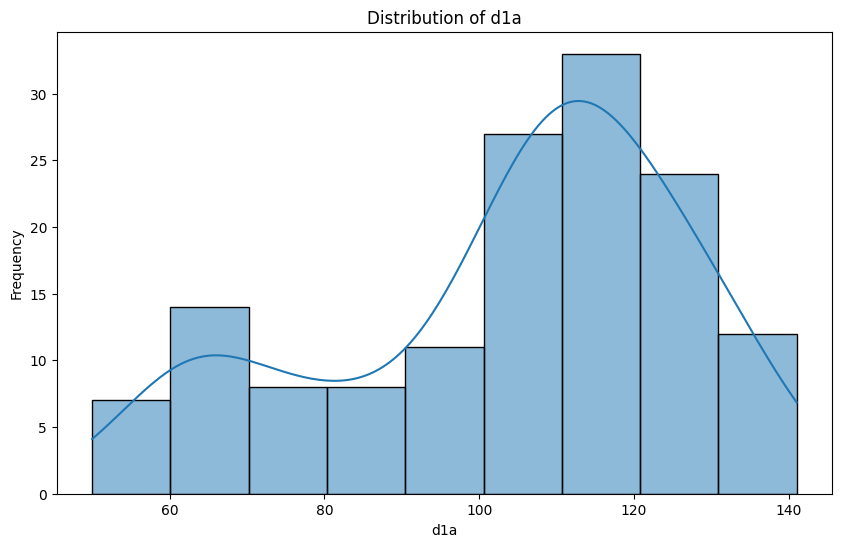


Analysis for column: d1s
Descriptive Statistics:
count    144.00000
mean       4.62500
std        2.76561
min        1.00000
25%        3.00000
50%        4.00000
75%        6.00000
max       13.00000
Name: d1s, dtype: float64


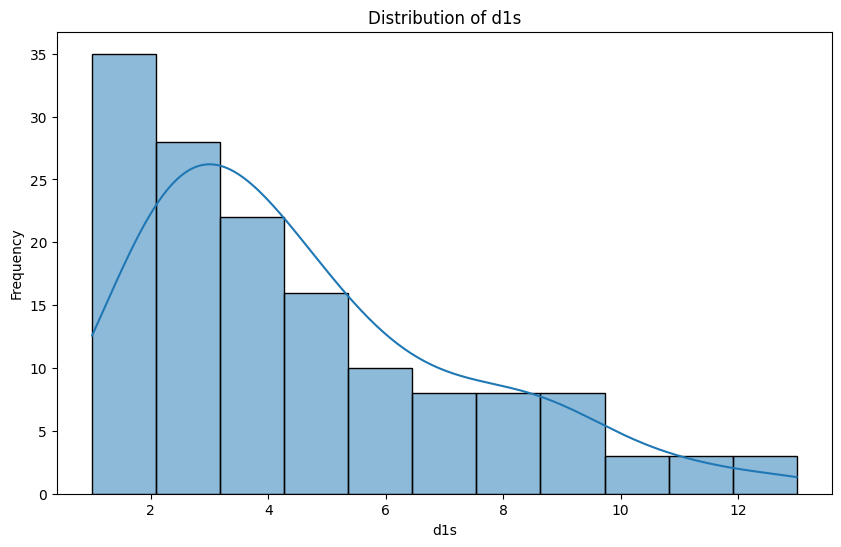


Analysis for column: d2a
Descriptive Statistics:
count    144.000000
mean      92.923611
std       23.223174
min       42.000000
25%       78.000000
50%       95.500000
75%      112.000000
max      132.000000
Name: d2a, dtype: float64


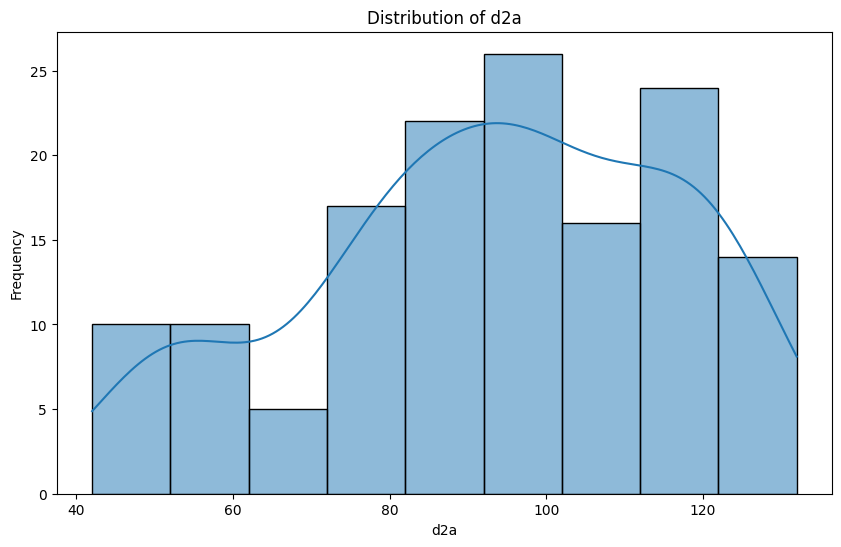


Analysis for column: d2s
Descriptive Statistics:
count    144.000000
mean       4.868056
std        3.022634
min        1.000000
25%        2.000000
50%        4.000000
75%        7.000000
max       14.000000
Name: d2s, dtype: float64


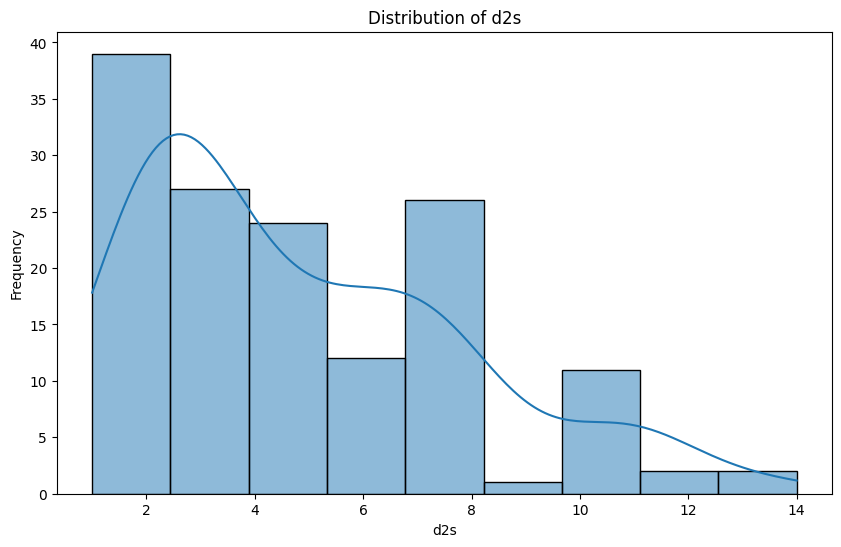


Analysis for column: h1a
Descriptive Statistics:
count    144.000000
mean      77.923611
std        5.554661
min       64.000000
25%       75.000000
50%       79.000000
75%       82.000000
max       87.000000
Name: h1a, dtype: float64


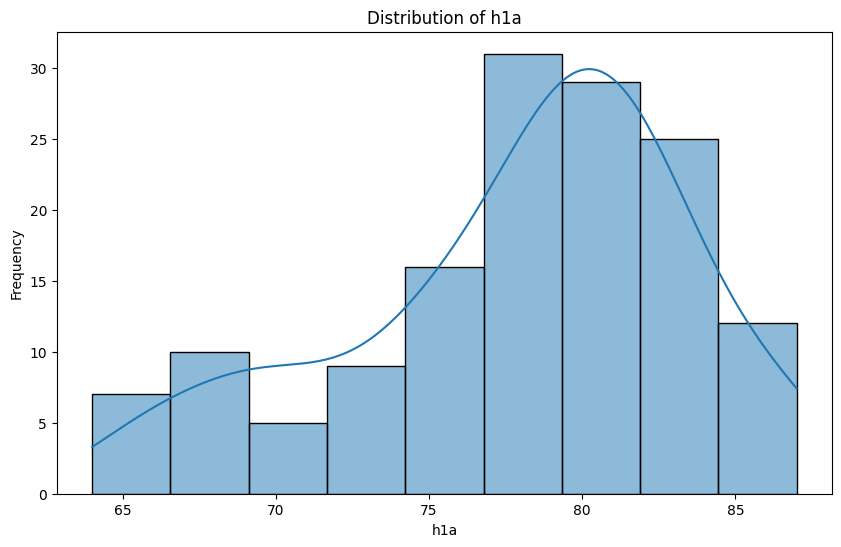


Analysis for column: h1x
Descriptive Statistics:
count    144.000000
mean      78.972222
std        5.496273
min       65.000000
25%       76.000000
50%       80.000000
75%       83.000000
max       88.000000
Name: h1x, dtype: float64


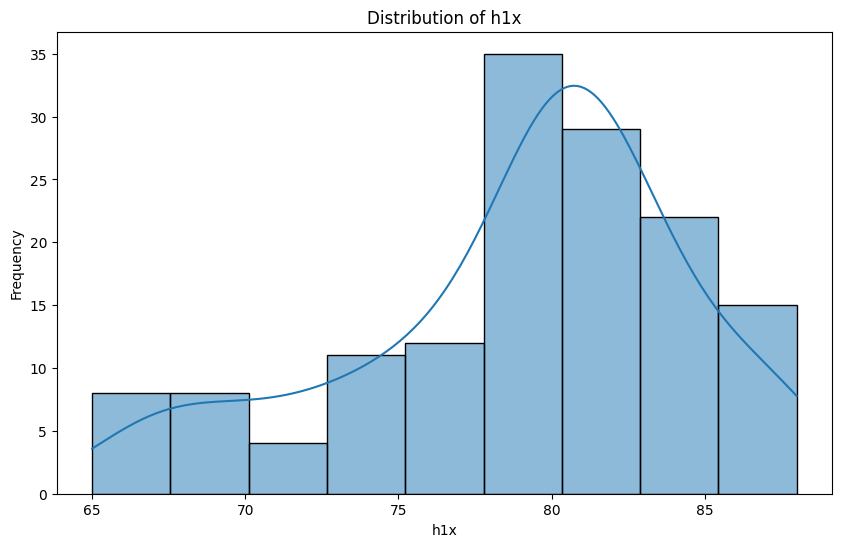


Analysis for column: h1i
Descriptive Statistics:
count    144.000000
mean      76.909722
std        5.653037
min       64.000000
25%       73.000000
50%       78.000000
75%       81.000000
max       87.000000
Name: h1i, dtype: float64


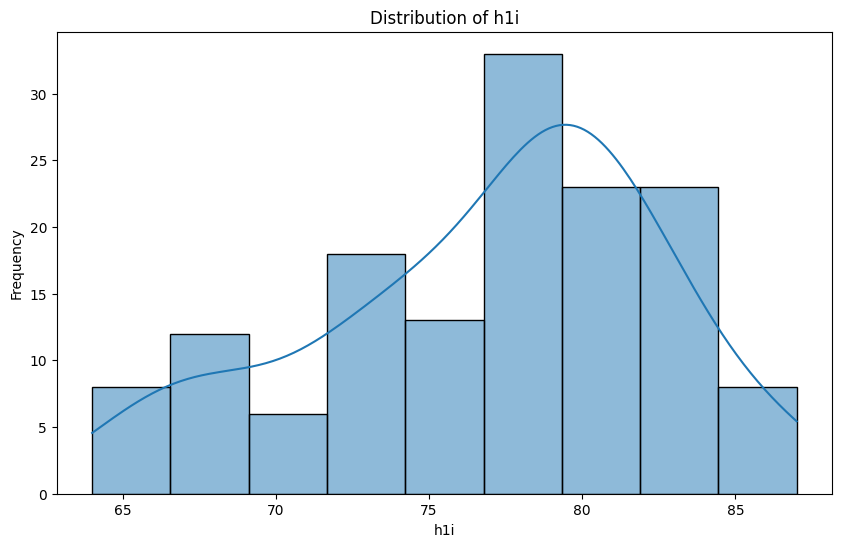


Analysis for column: t1a
Descriptive Statistics:
count    144.000000
mean       2.641667
std        0.739542
min        0.050000
25%        2.350000
50%        2.650000
75%        3.050000
max        3.950000
Name: t1a, dtype: float64


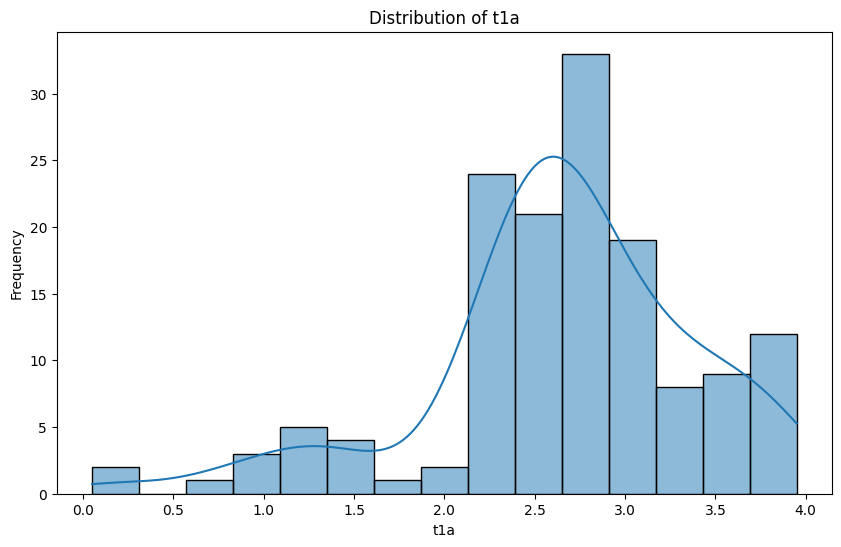


Analysis for column: t1x
Descriptive Statistics:
count    144.000000
mean       2.753472
std        0.709418
min        0.150000
25%        2.450000
50%        2.750000
75%        3.150000
max        4.050000
Name: t1x, dtype: float64


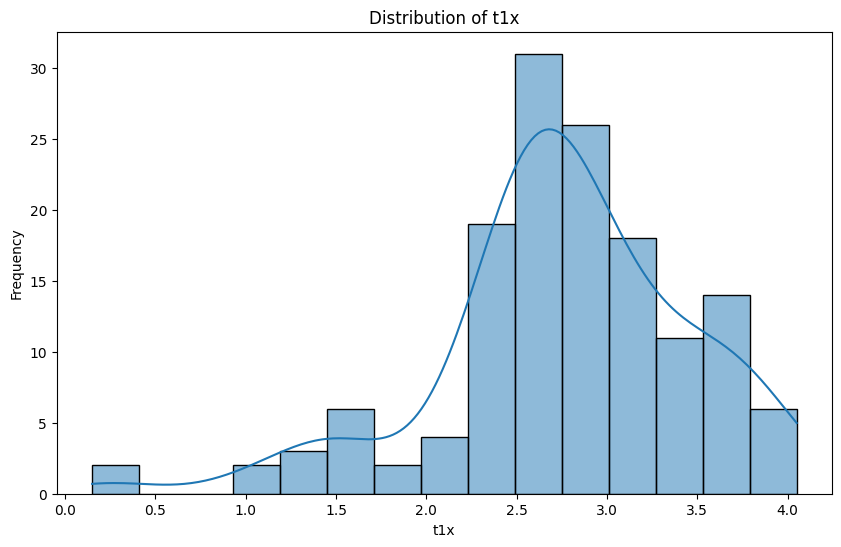


Analysis for column: t1i
Descriptive Statistics:
count    144.000000
mean       2.530556
std        0.782794
min       -0.050000
25%        2.250000
50%        2.550000
75%        2.950000
max        3.950000
Name: t1i, dtype: float64


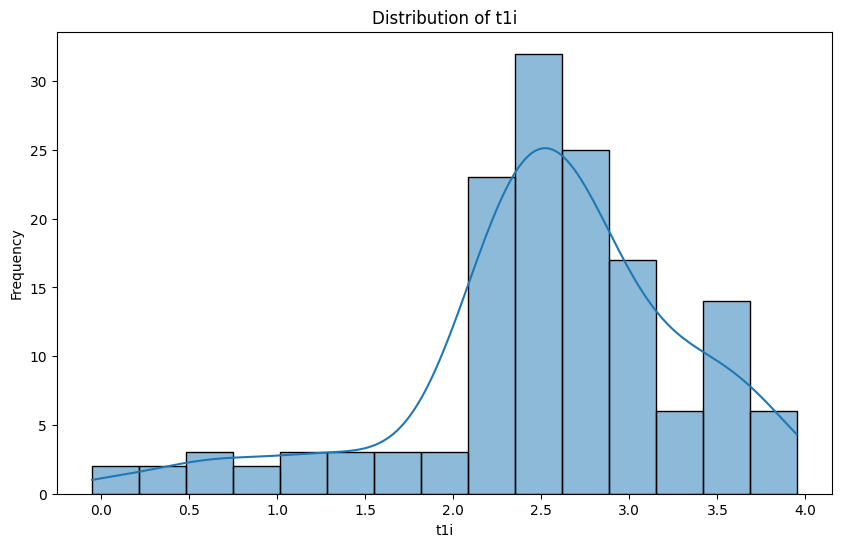


Analysis for column: b1a
Descriptive Statistics:
count     144.000000
mean     1009.756944
std         1.012140
min      1009.000000
25%      1009.000000
50%      1009.000000
75%      1010.000000
max      1013.000000
Name: b1a, dtype: float64


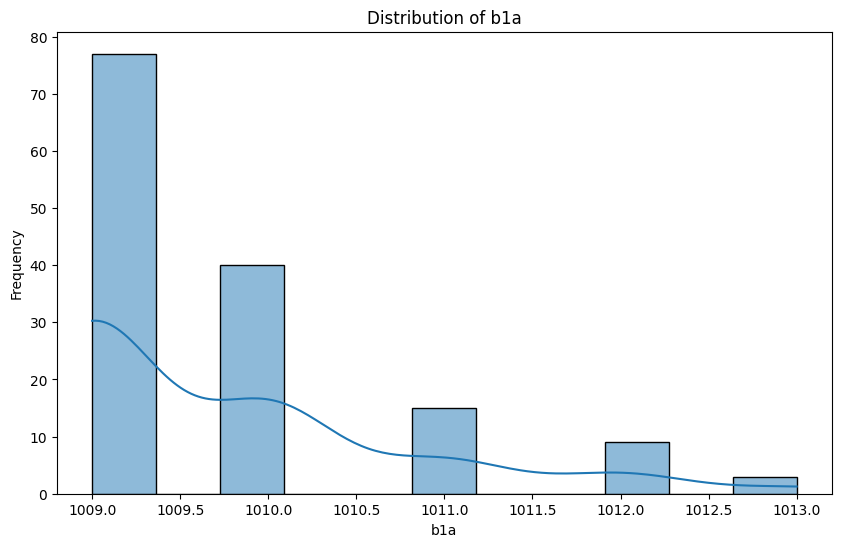


Analysis for column: b1x
Descriptive Statistics:
count     144.000000
mean     1010.076389
std         1.071434
min      1009.000000
25%      1009.000000
50%      1010.000000
75%      1010.000000
max      1013.000000
Name: b1x, dtype: float64


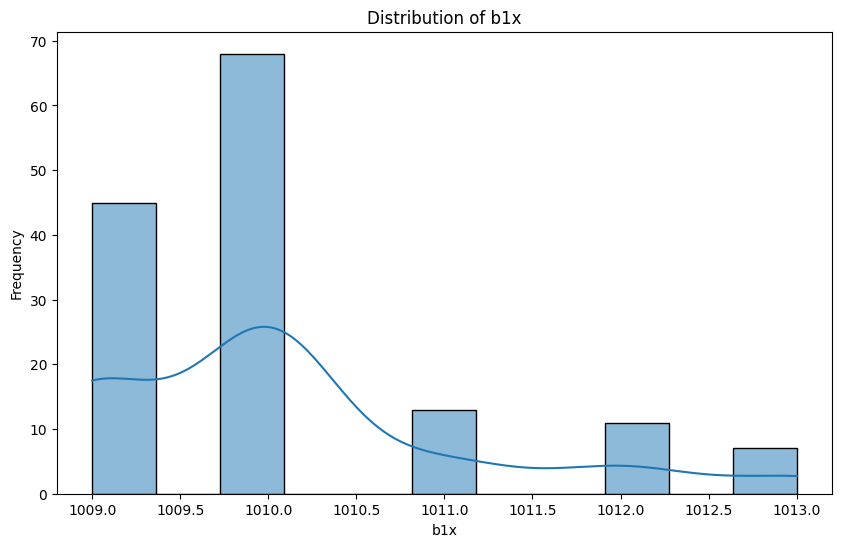


Analysis for column: b1i
Descriptive Statistics:
count     144.000000
mean     1009.388889
std         1.024941
min      1008.000000
25%      1009.000000
50%      1009.000000
75%      1009.250000
max      1012.000000
Name: b1i, dtype: float64


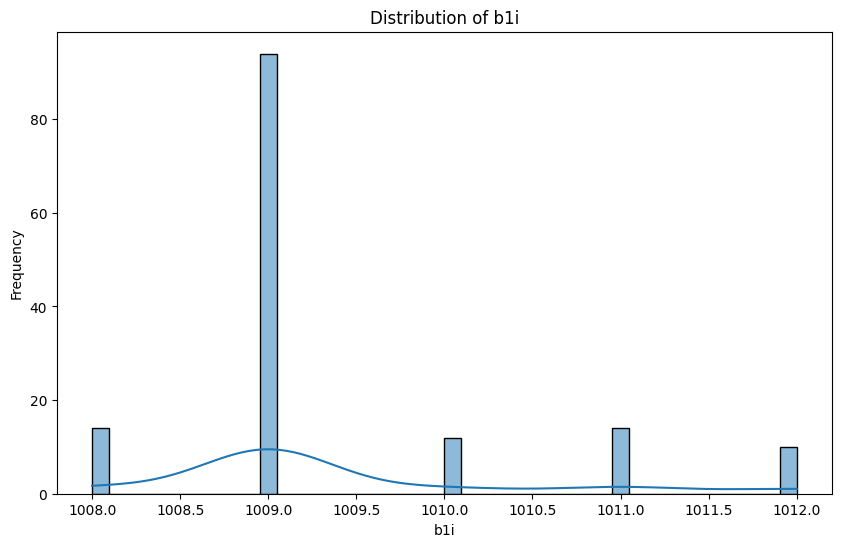


Analysis for column: p1a
Descriptive Statistics:
count    144.000000
mean       4.704873
std        1.637906
min        2.002400
25%        3.483350
50%        4.194030
75%        5.946645
max        8.040840
Name: p1a, dtype: float64


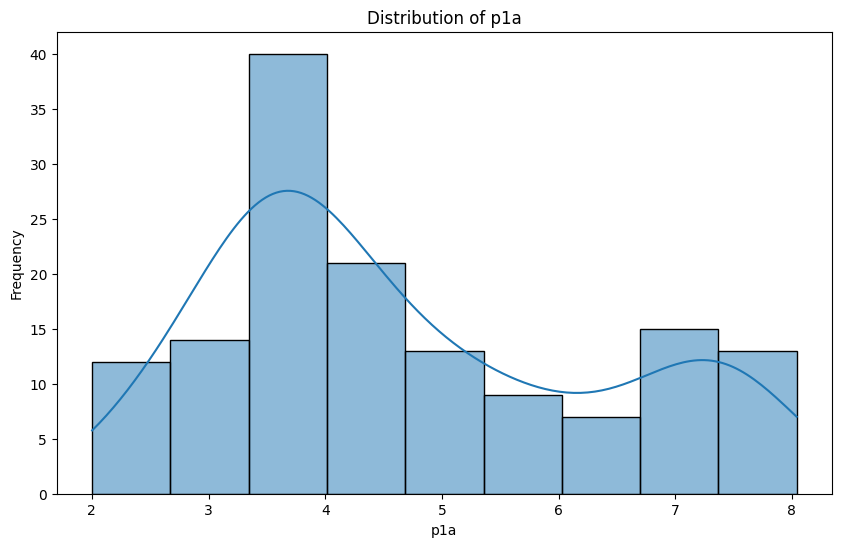


Analysis for column: p1x
Descriptive Statistics:
count    144.000000
mean       5.531635
std        1.654495
min        2.887300
25%        4.159638
50%        4.950550
75%        6.796012
max        8.756100
Name: p1x, dtype: float64


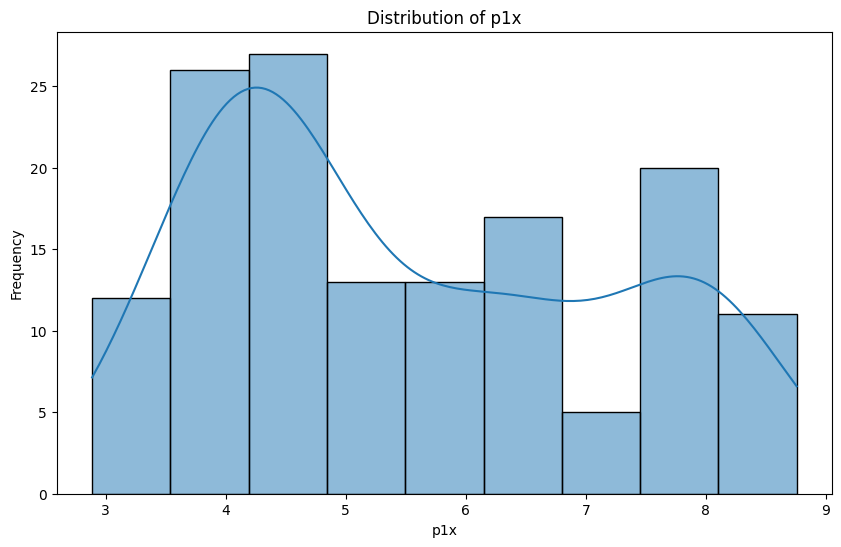


Analysis for column: p1i
Descriptive Statistics:
count    144.000000
mean       3.883901
std        1.711689
min        1.053300
25%        2.646587
50%        3.391650
75%        5.409050
max        7.334750
Name: p1i, dtype: float64


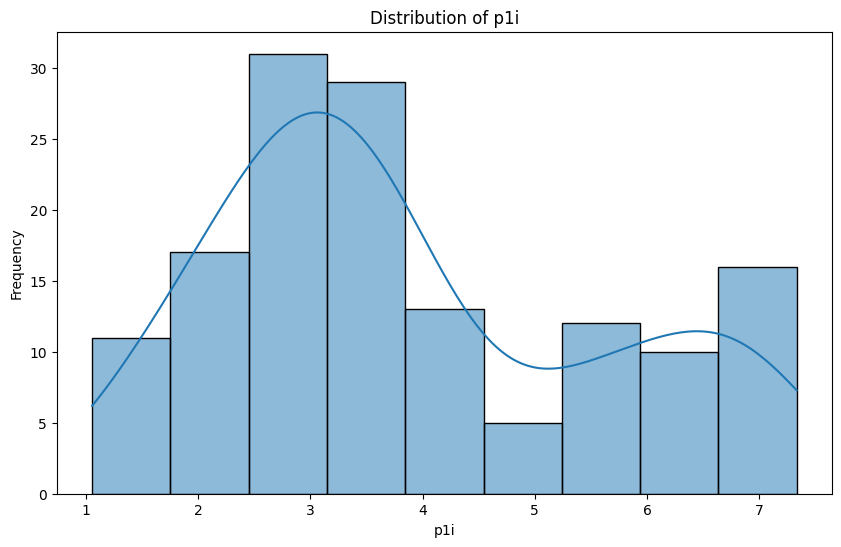


Analysis for column: p1s
Descriptive Statistics:
count    144.000000
mean       0.318151
std        0.183407
min        0.064190
25%        0.187990
50%        0.270520
75%        0.383997
max        1.095820
Name: p1s, dtype: float64


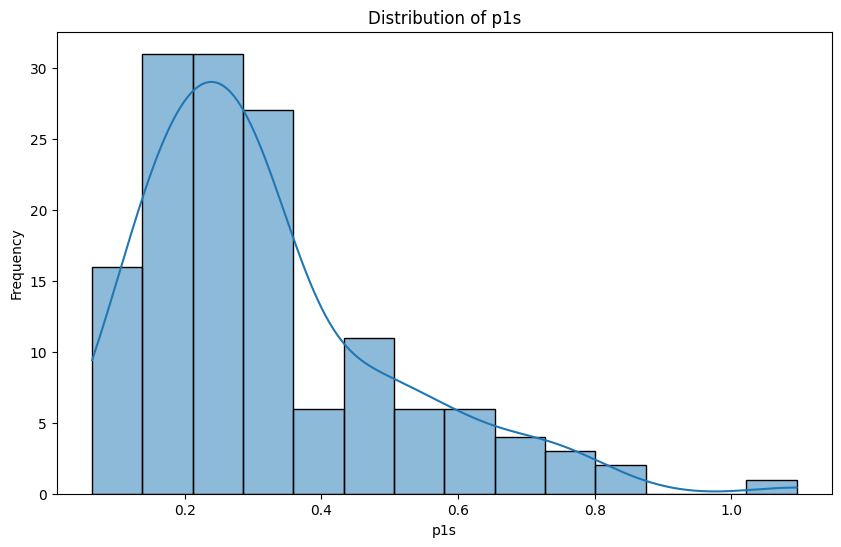


Analysis for column: tia
Descriptive Statistics:
count    144.000000
mean      42.180556
std        2.292135
min       38.000000
25%       41.000000
50%       42.000000
75%       44.000000
max       46.000000
Name: tia, dtype: float64


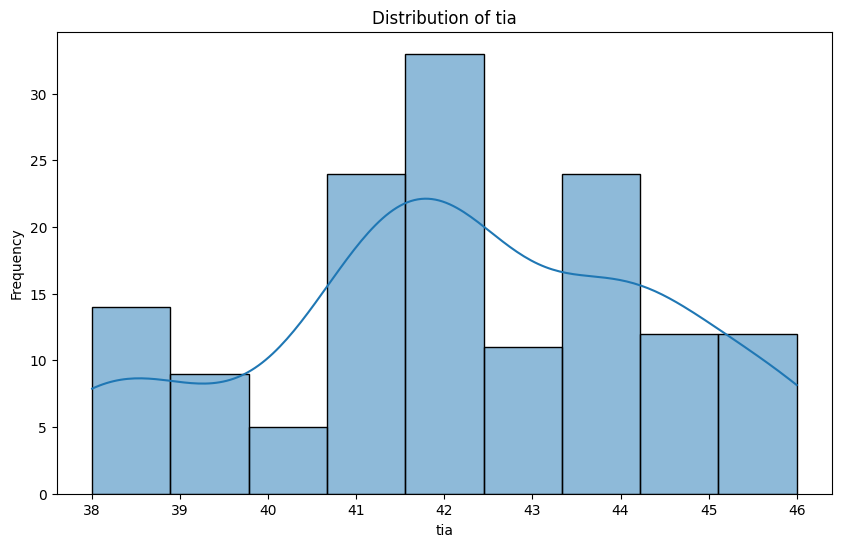


Analysis for column: tix
Descriptive Statistics:
count    144.000000
mean      42.236111
std        2.280922
min       38.000000
25%       41.000000
50%       42.000000
75%       44.000000
max       46.000000
Name: tix, dtype: float64


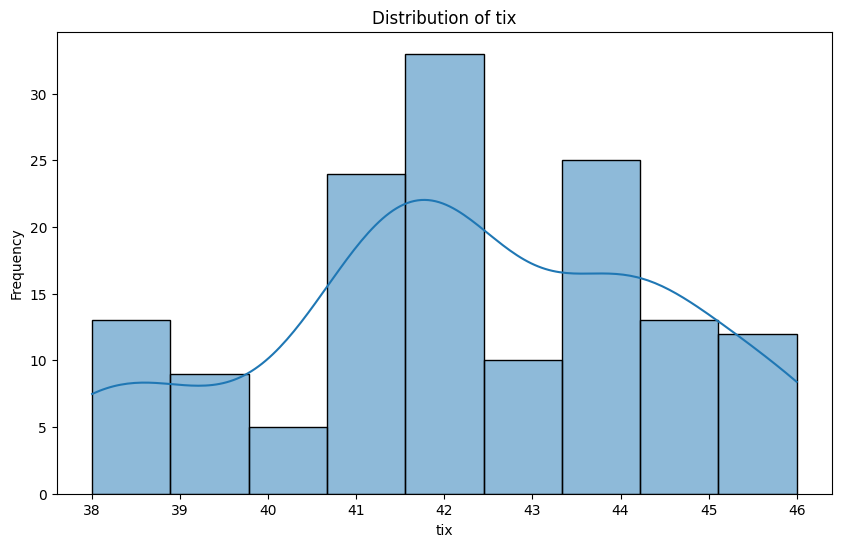


Analysis for column: tii
Descriptive Statistics:
count    144.000000
mean      42.138889
std        2.267469
min       38.000000
25%       41.000000
50%       42.000000
75%       44.000000
max       46.000000
Name: tii, dtype: float64


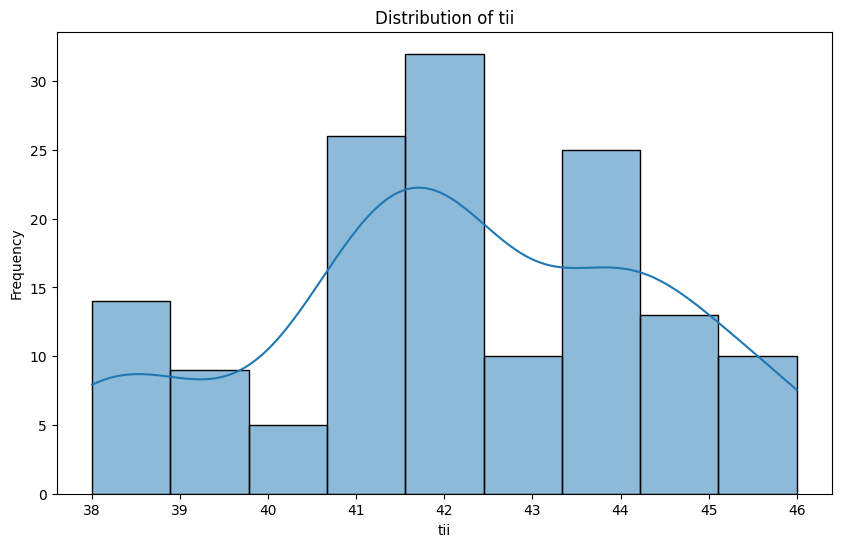


Analysis for column: vxa
Descriptive Statistics:
count    144.000000
mean     130.125000
std        5.704709
min      125.000000
25%      126.000000
50%      127.000000
75%      138.000000
max      139.000000
Name: vxa, dtype: float64


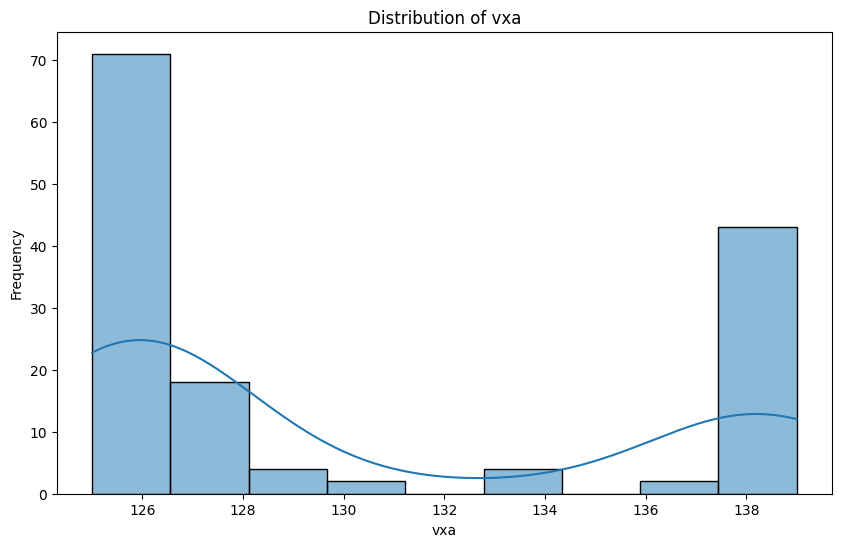


Analysis for column: vxx
Descriptive Statistics:
count    144.000000
mean     130.555556
std        6.055429
min      125.000000
25%      126.000000
50%      127.000000
75%      139.000000
max      141.000000
Name: vxx, dtype: float64


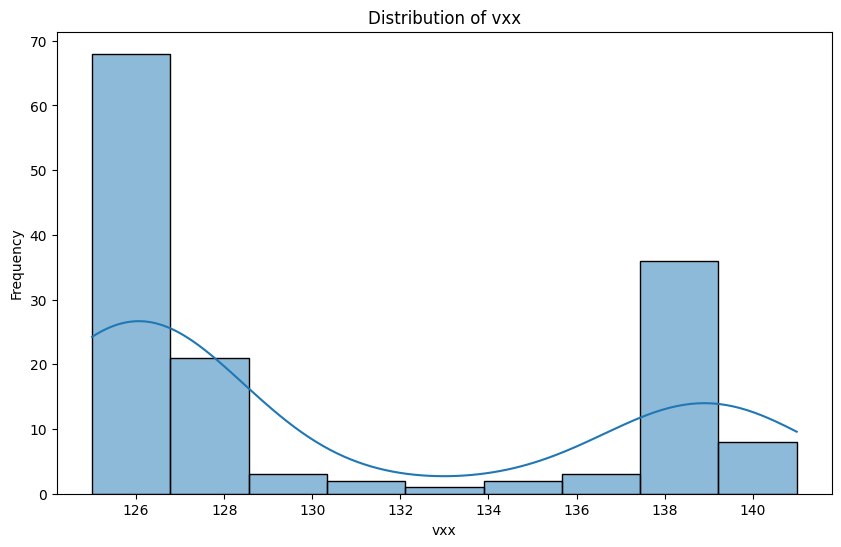


Analysis for column: vxi
Descriptive Statistics:
count    144.000000
mean     129.722222
std        5.443215
min      125.000000
25%      126.000000
50%      126.000000
75%      137.000000
max      139.000000
Name: vxi, dtype: float64


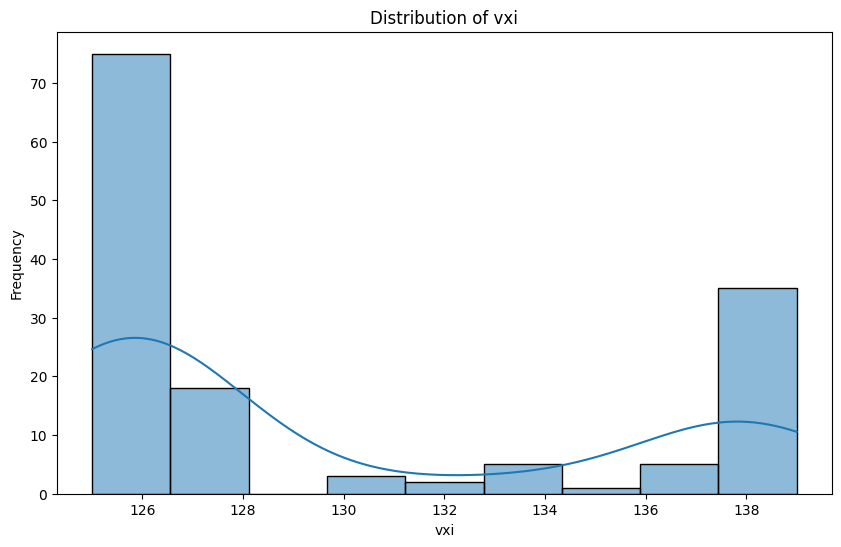


Analysis for column: bla
Descriptive Statistics:
count    144.0
mean      83.0
std        0.0
min       83.0
25%       83.0
50%       83.0
75%       83.0
max       83.0
Name: bla, dtype: float64


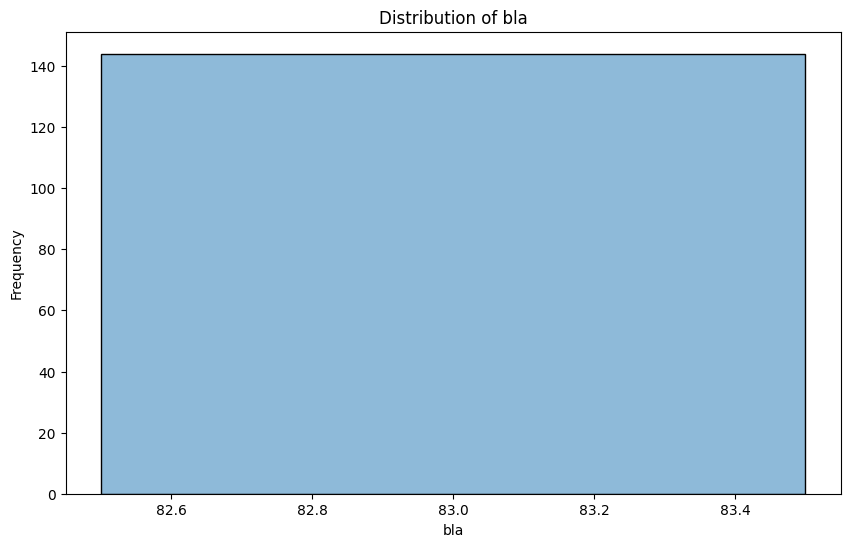


Analysis for column: blx
Descriptive Statistics:
count    144.0
mean      83.0
std        0.0
min       83.0
25%       83.0
50%       83.0
75%       83.0
max       83.0
Name: blx, dtype: float64


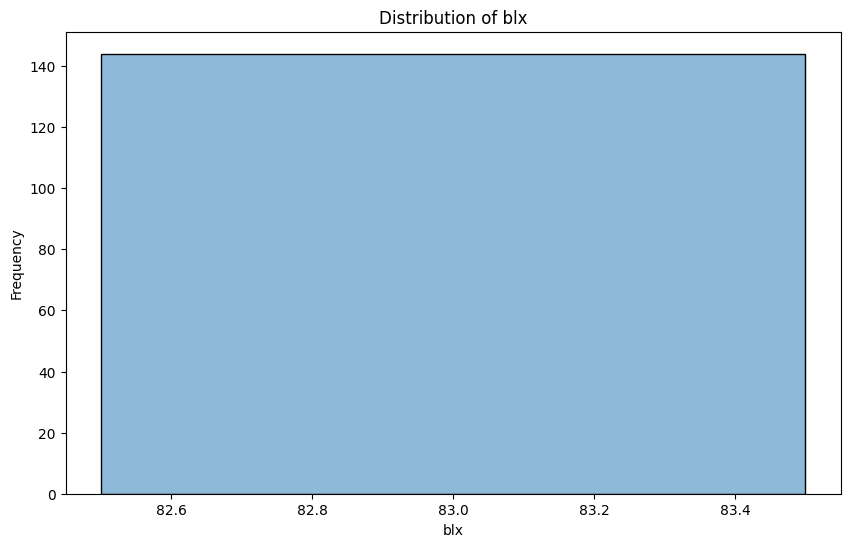


Analysis for column: bli
Descriptive Statistics:
count    144.0
mean      83.0
std        0.0
min       83.0
25%       83.0
50%       83.0
75%       83.0
max       83.0
Name: bli, dtype: float64


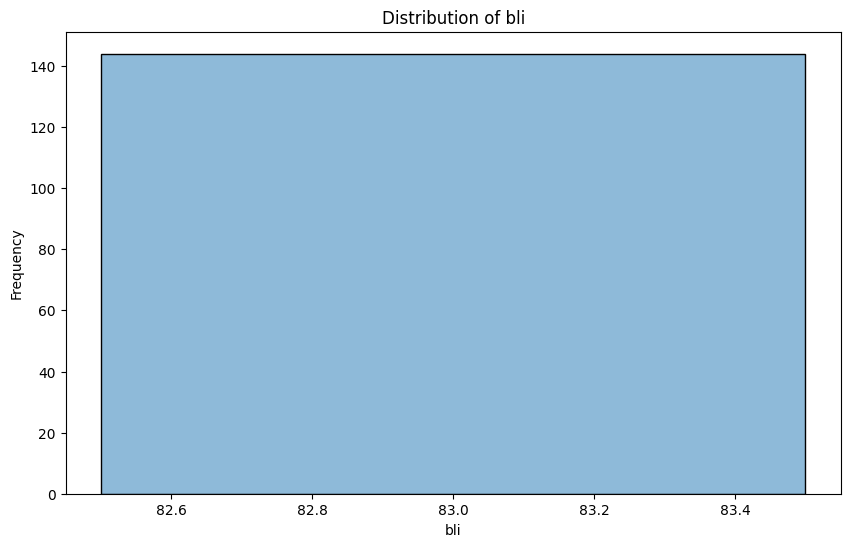


Analysis for column: bra
Descriptive Statistics:
count    144.0
mean      83.0
std        0.0
min       83.0
25%       83.0
50%       83.0
75%       83.0
max       83.0
Name: bra, dtype: float64


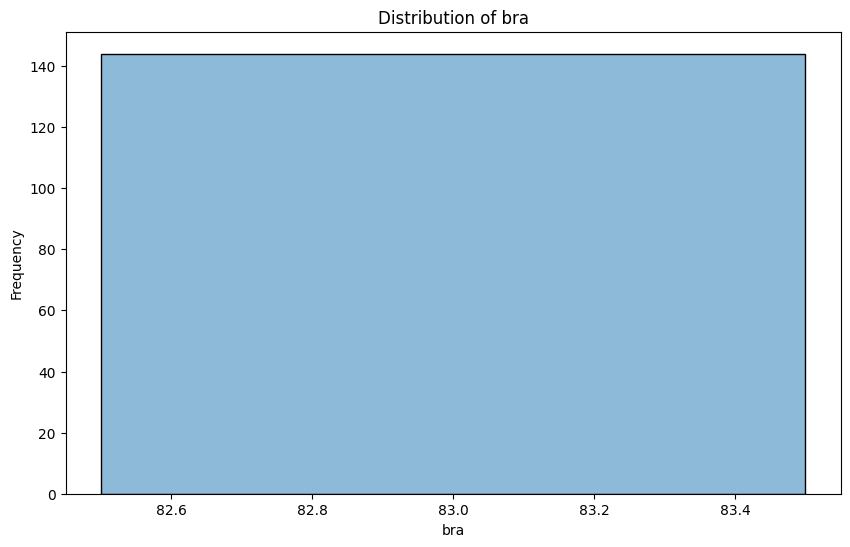


Analysis for column: brx
Descriptive Statistics:
count    144.0
mean      83.0
std        0.0
min       83.0
25%       83.0
50%       83.0
75%       83.0
max       83.0
Name: brx, dtype: float64


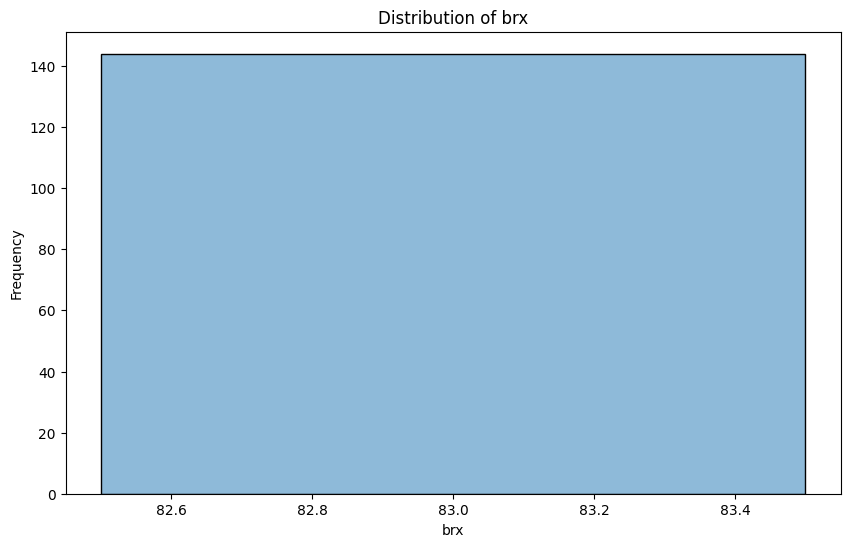


Analysis for column: bri
Descriptive Statistics:
count    144.0
mean      83.0
std        0.0
min       83.0
25%       83.0
50%       83.0
75%       83.0
max       83.0
Name: bri, dtype: float64


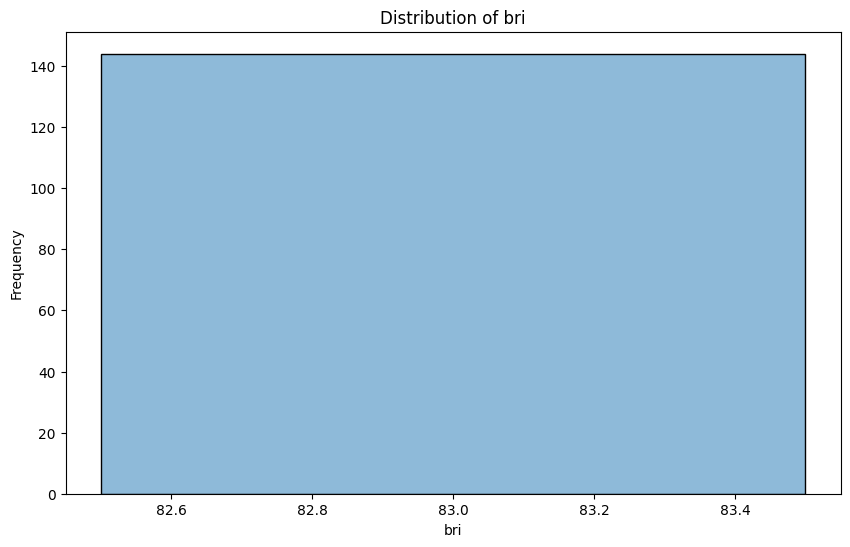

In [6]:
# Perform Statistical data analysis for each column
for column in df.columns:
    if column not in ['date', 'time', 'period']:
        print("\nAnalysis for column:", column)
        
        # Descriptive statistics
        print("Descriptive Statistics:")
        print(df[column].describe())
        
        # Data visualization
        plt.figure(figsize=(10, 6))
        sns.histplot(df[column], kde=True)
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()  

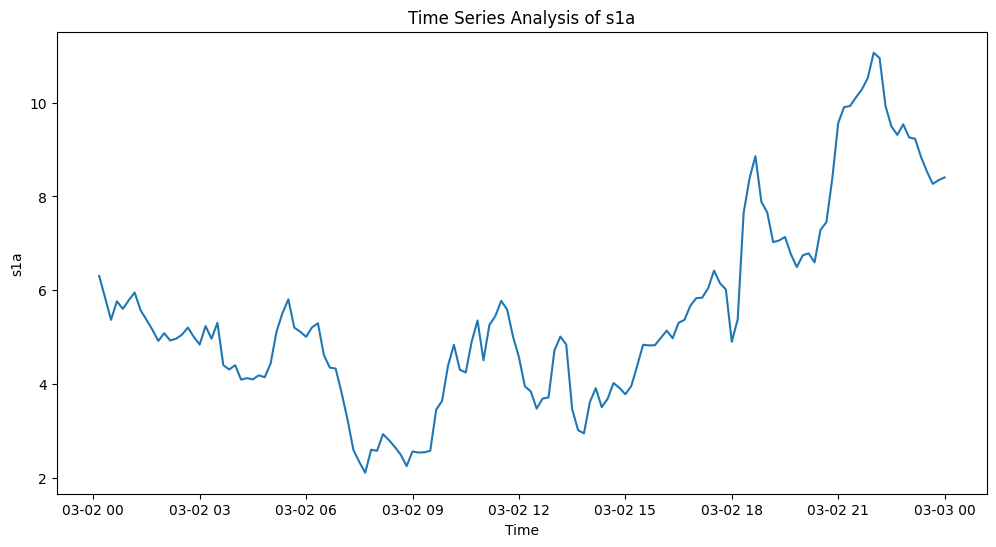

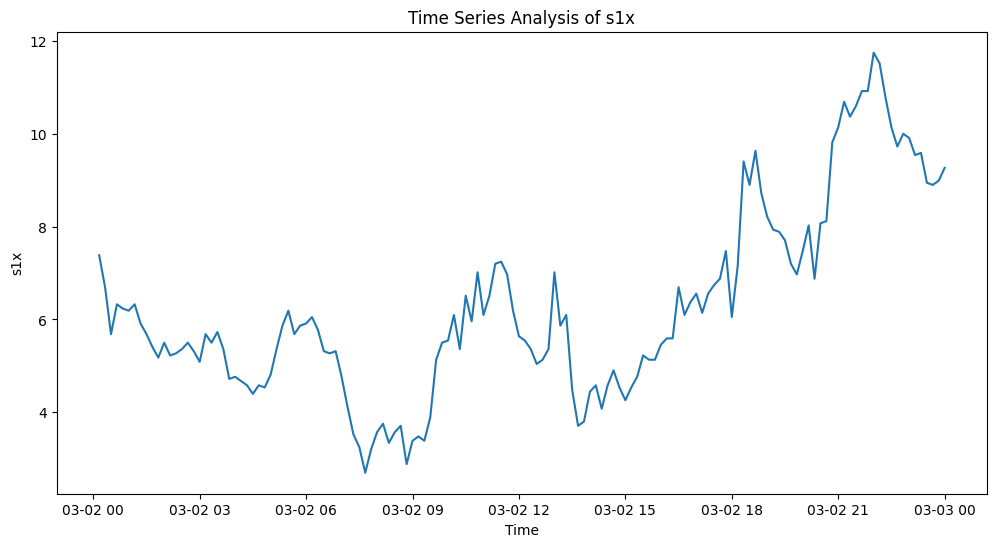

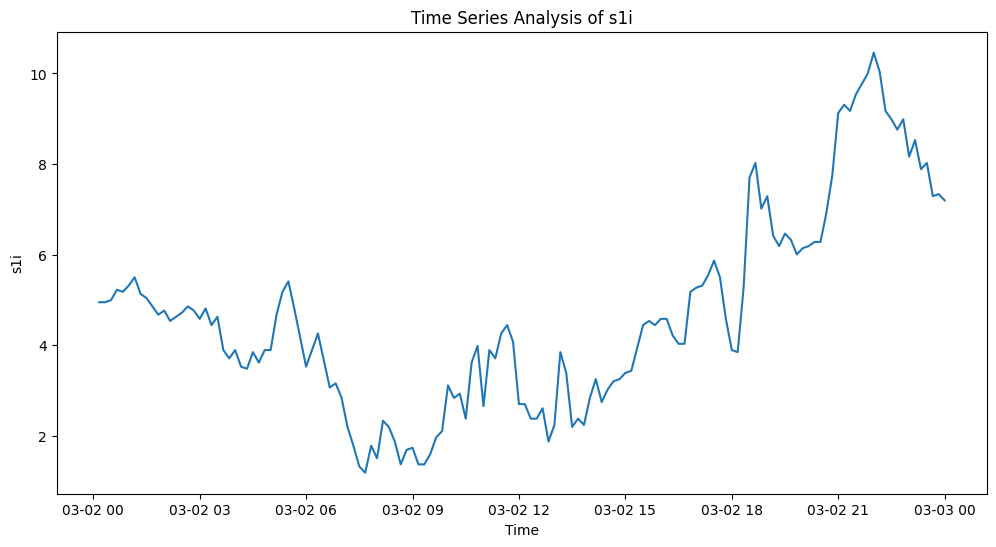

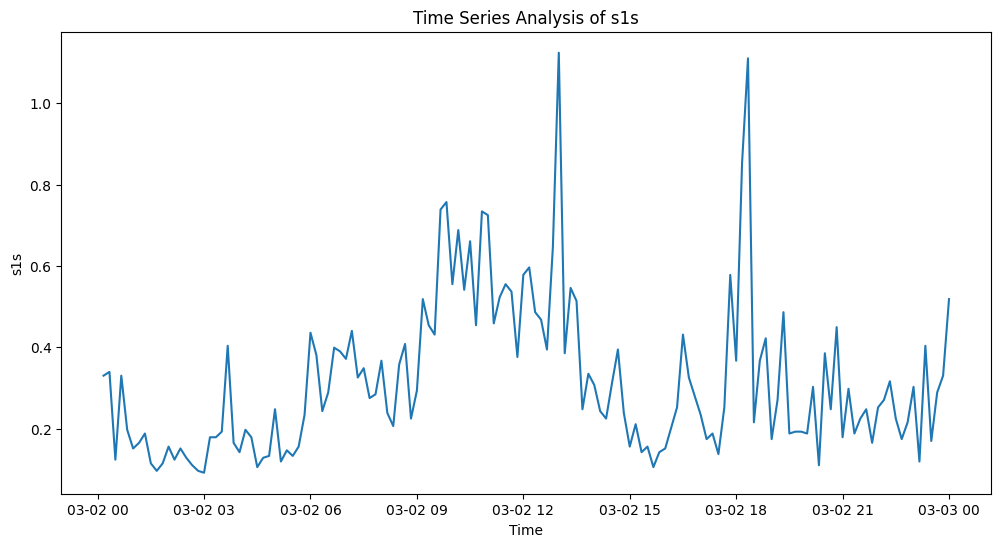

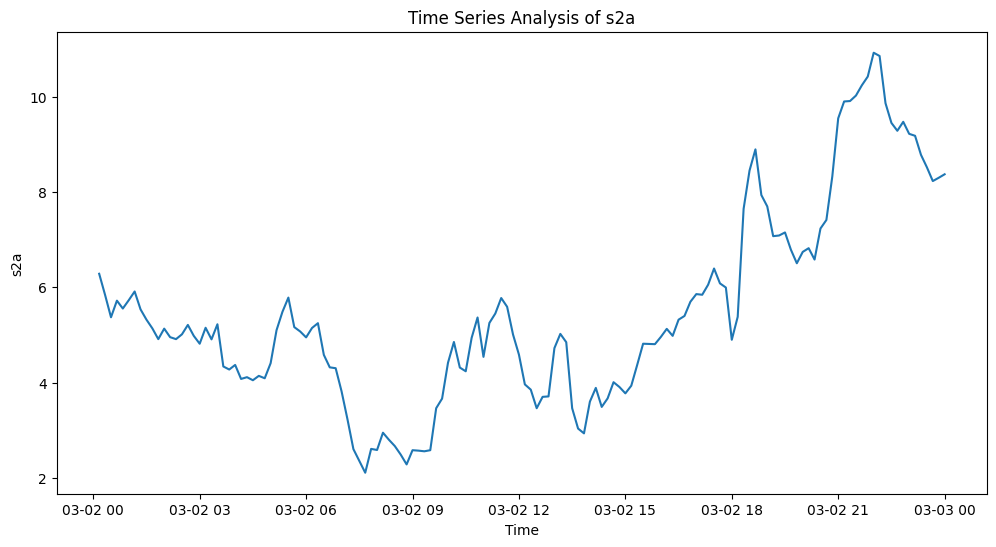

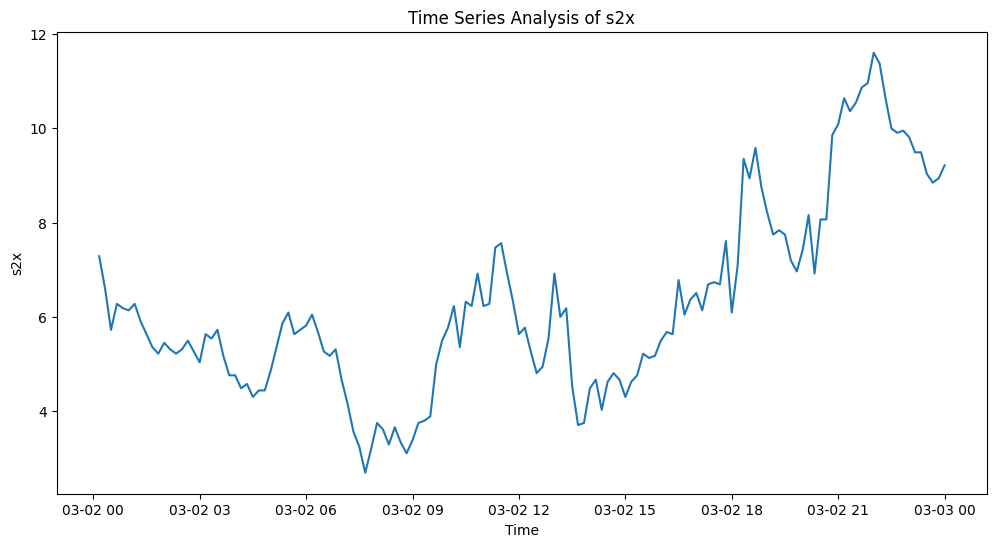

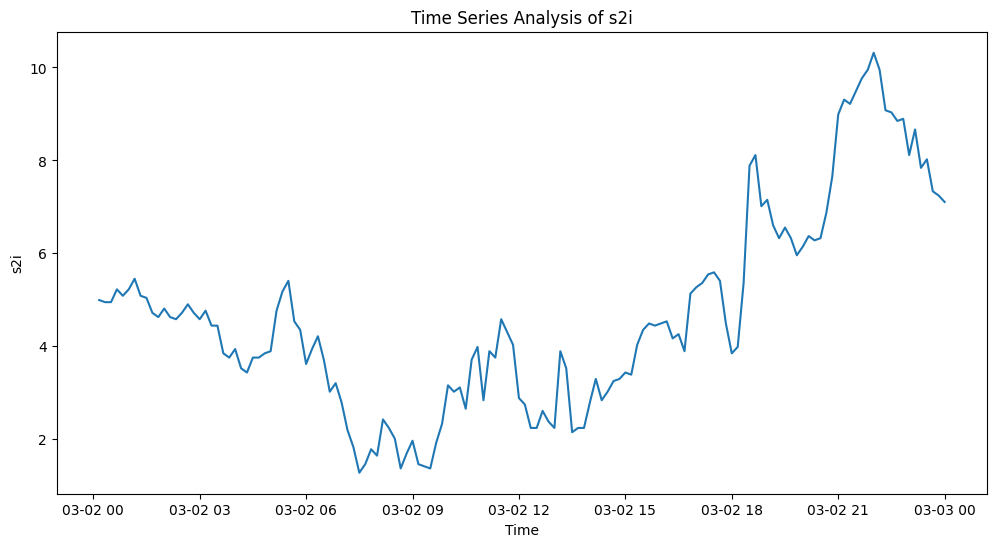

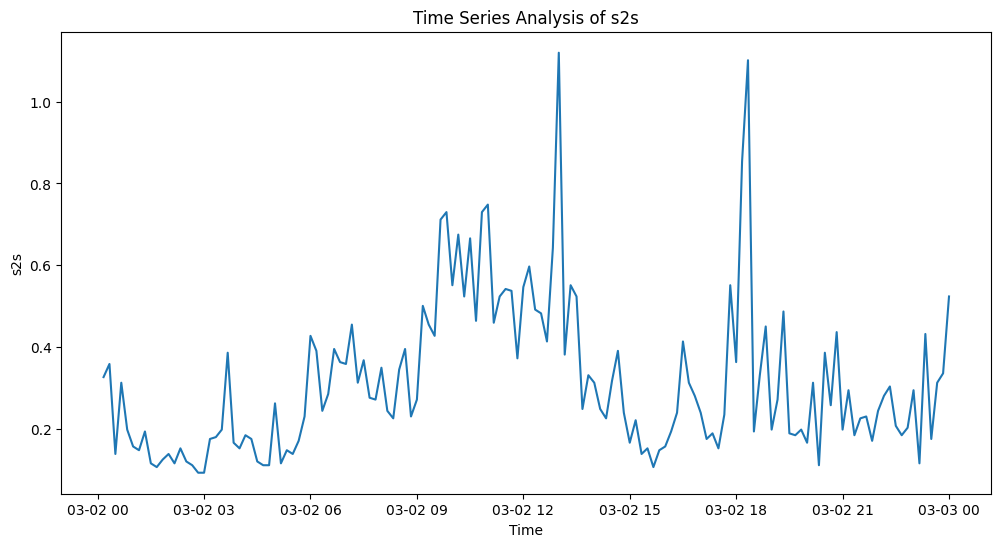

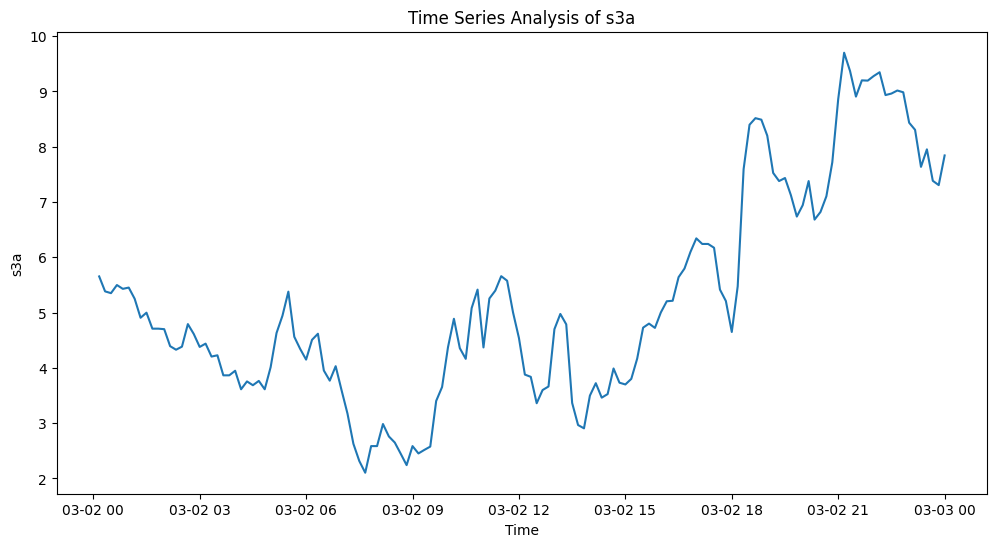

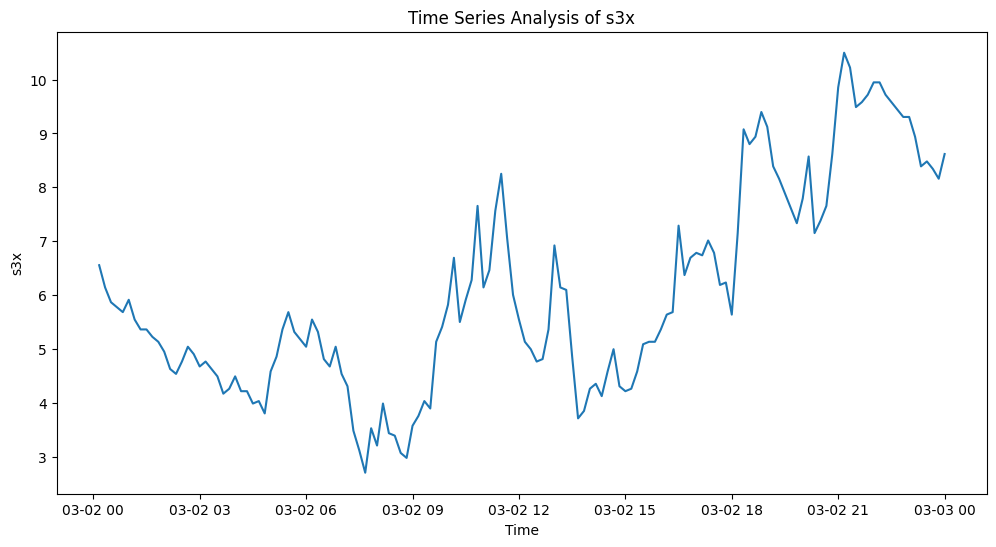

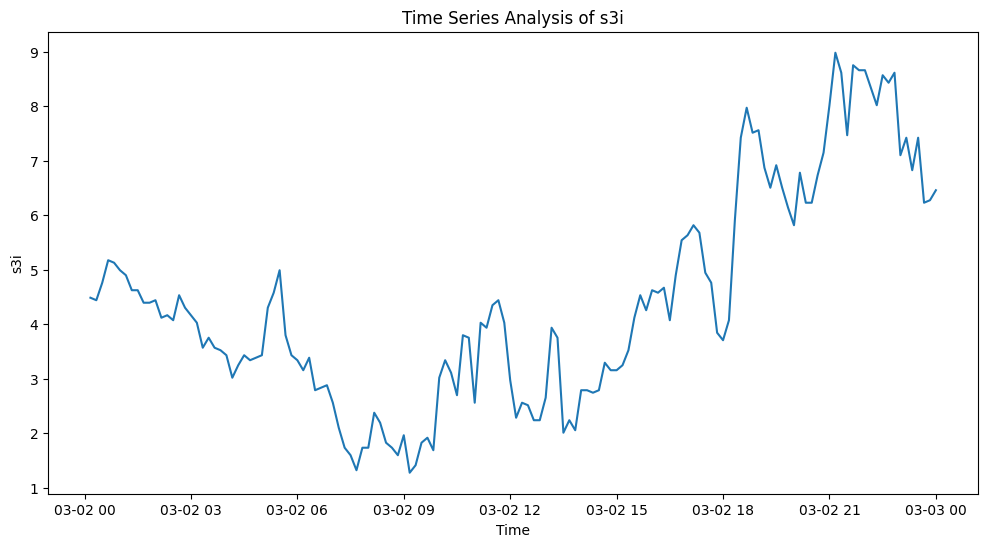

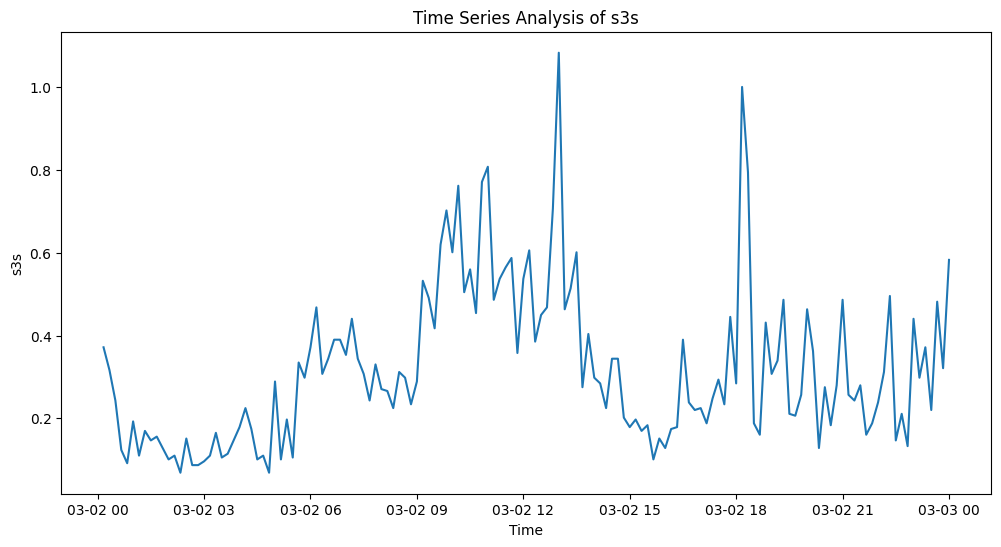

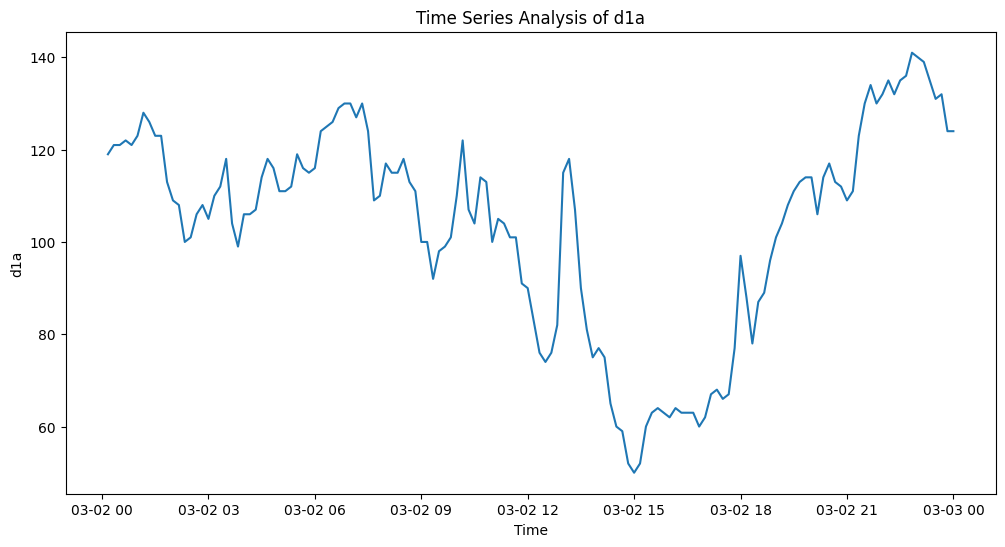

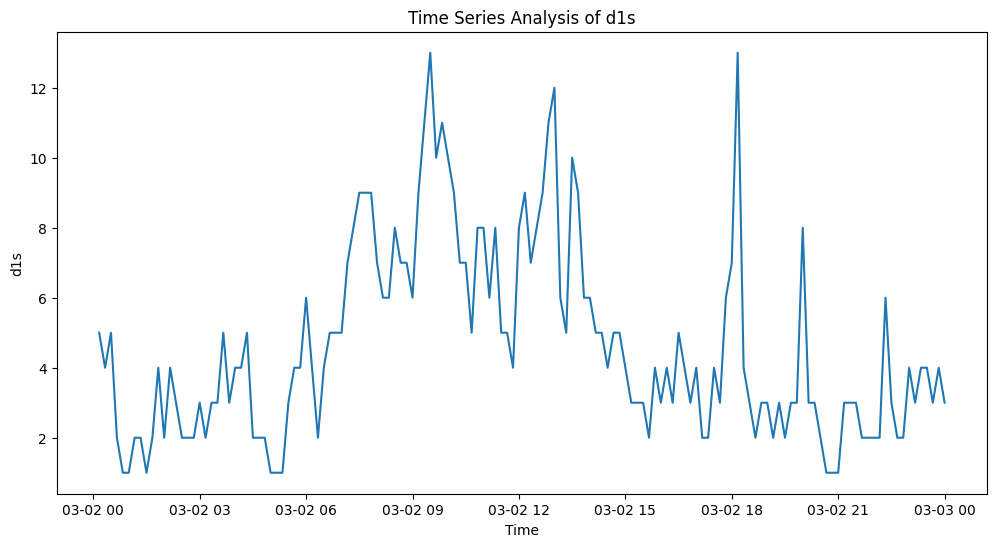

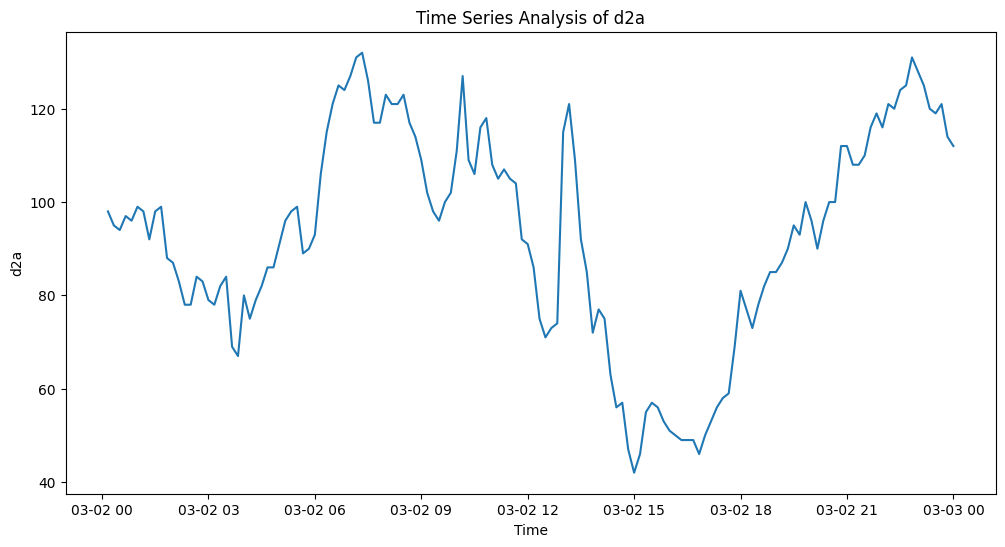

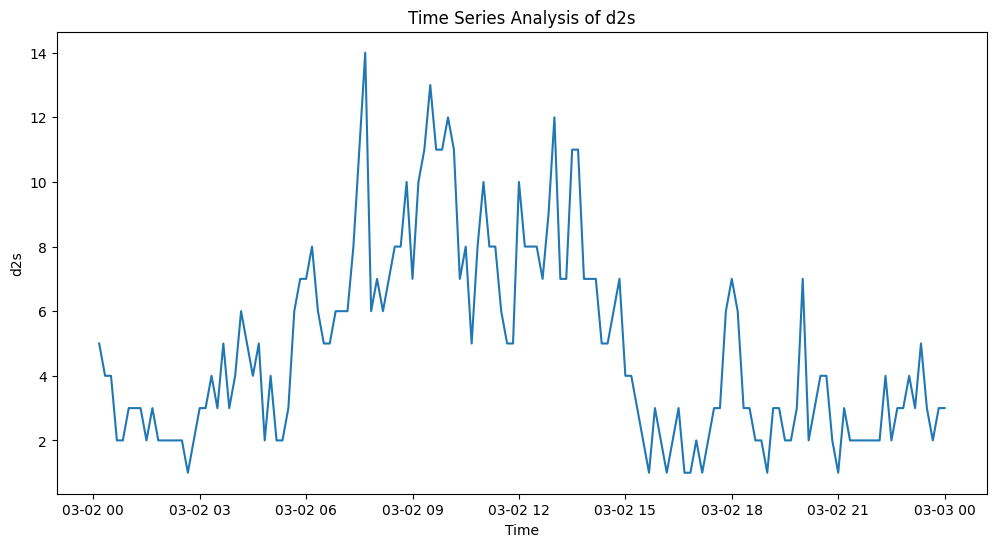

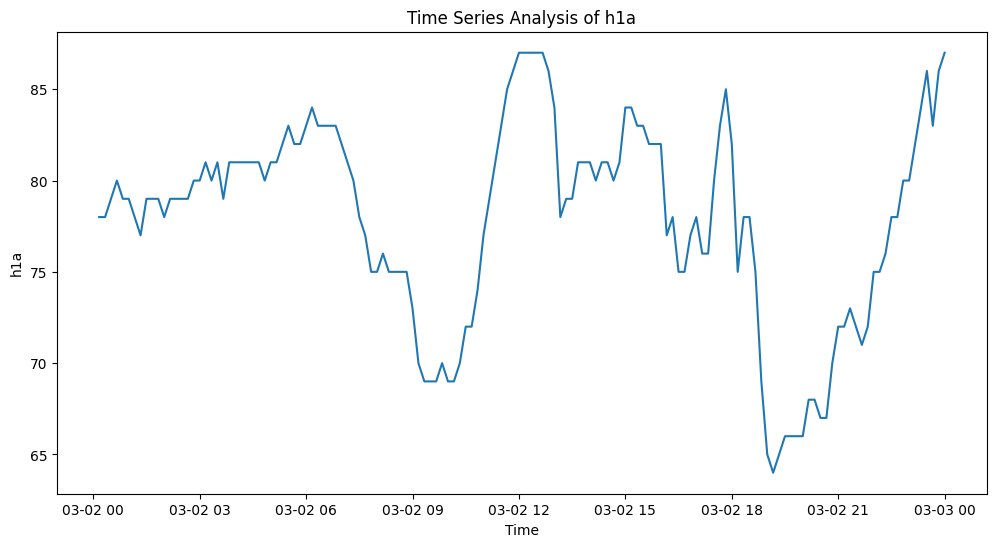

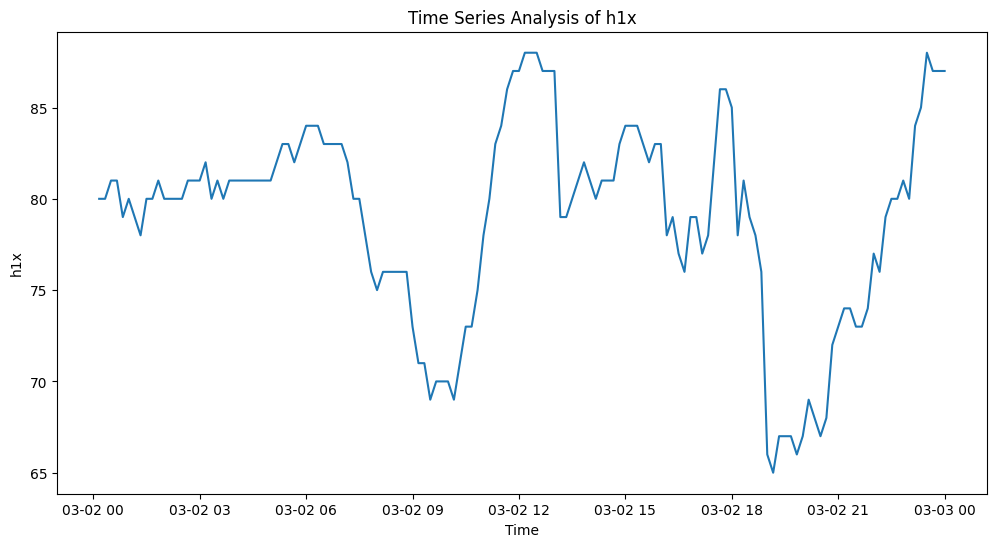

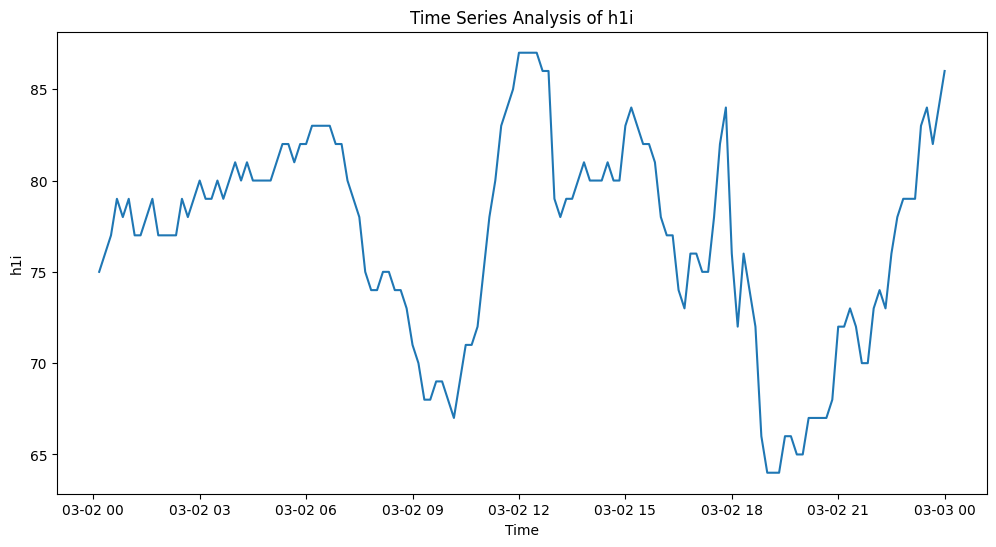

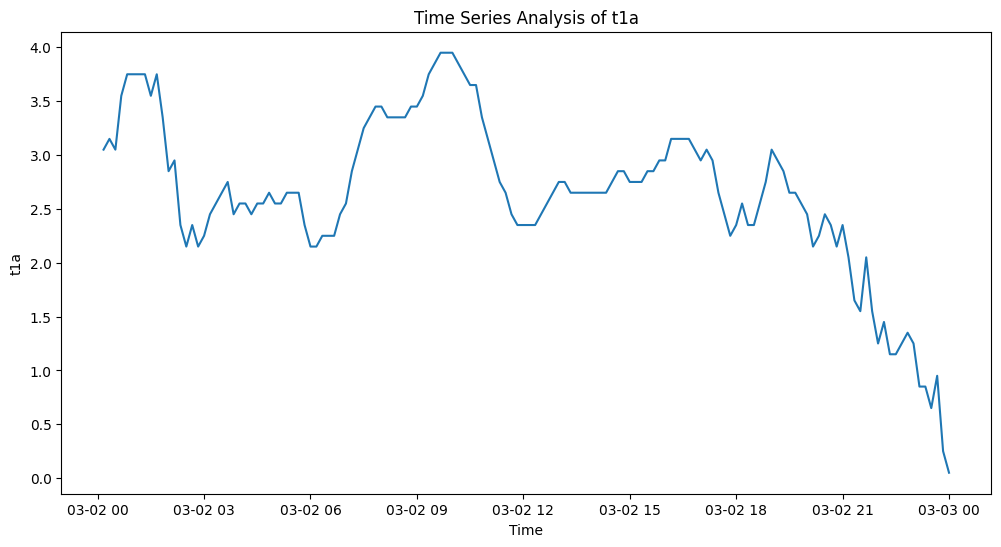

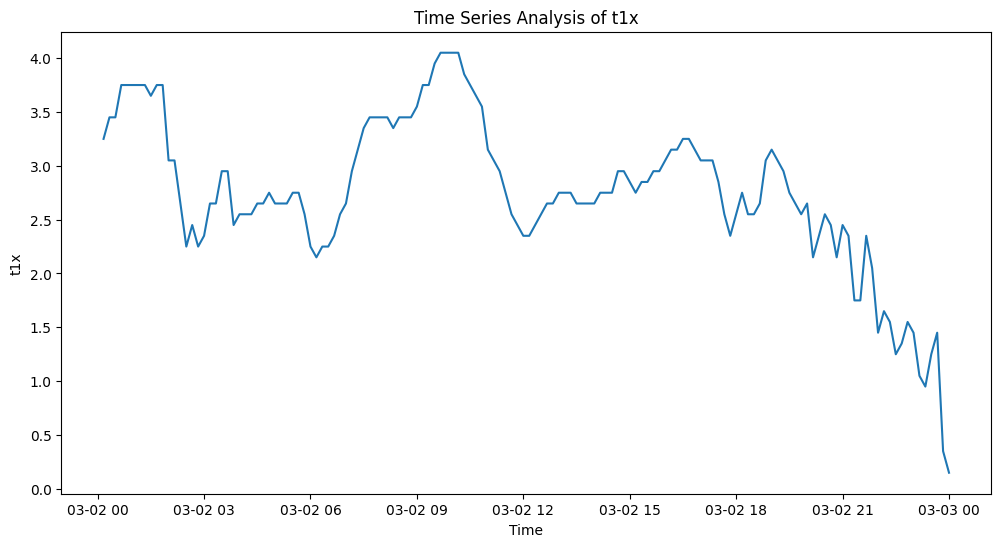

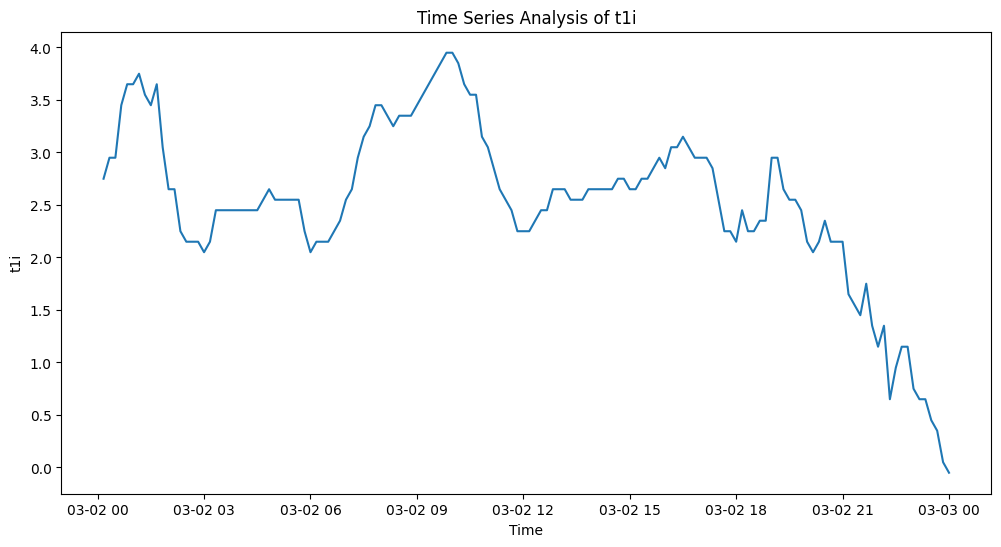

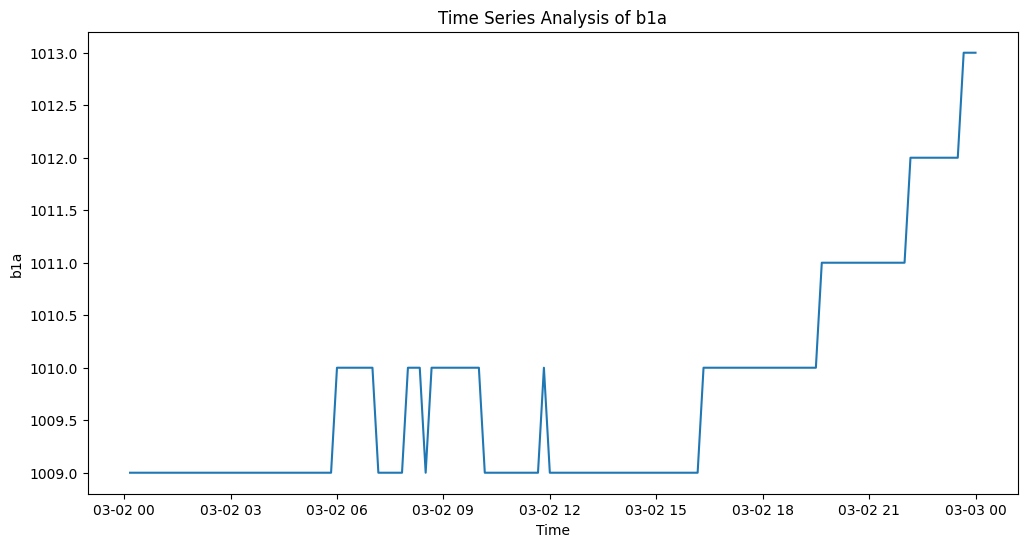

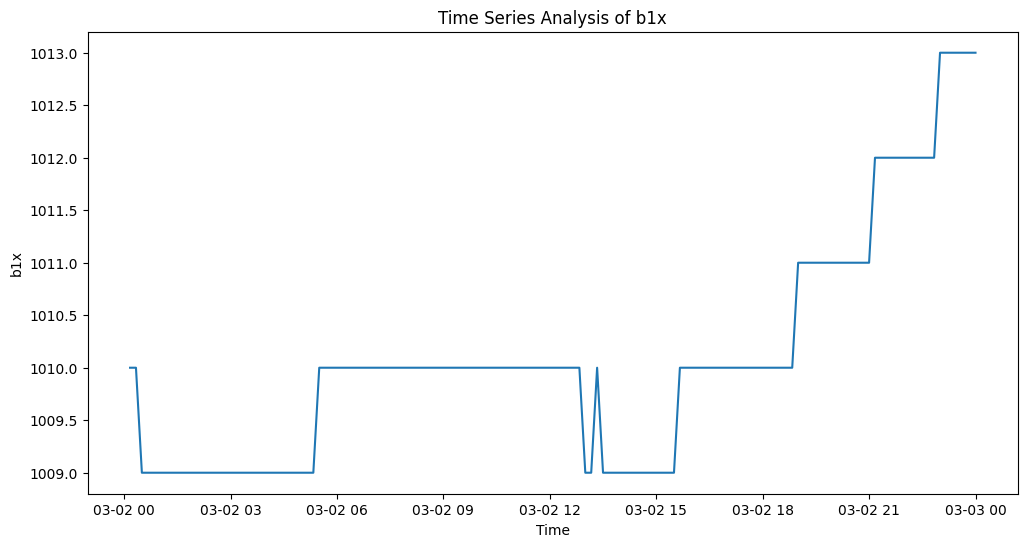

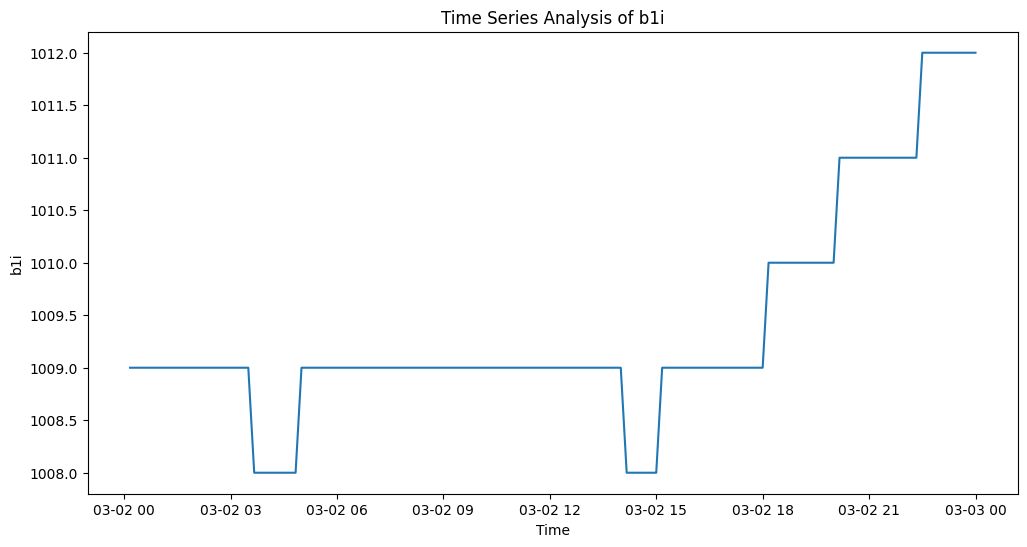

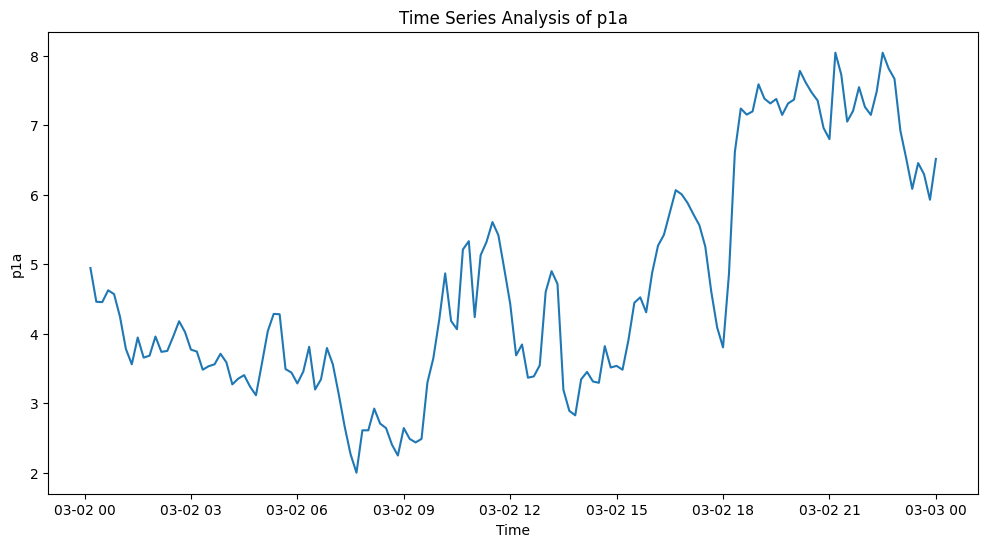

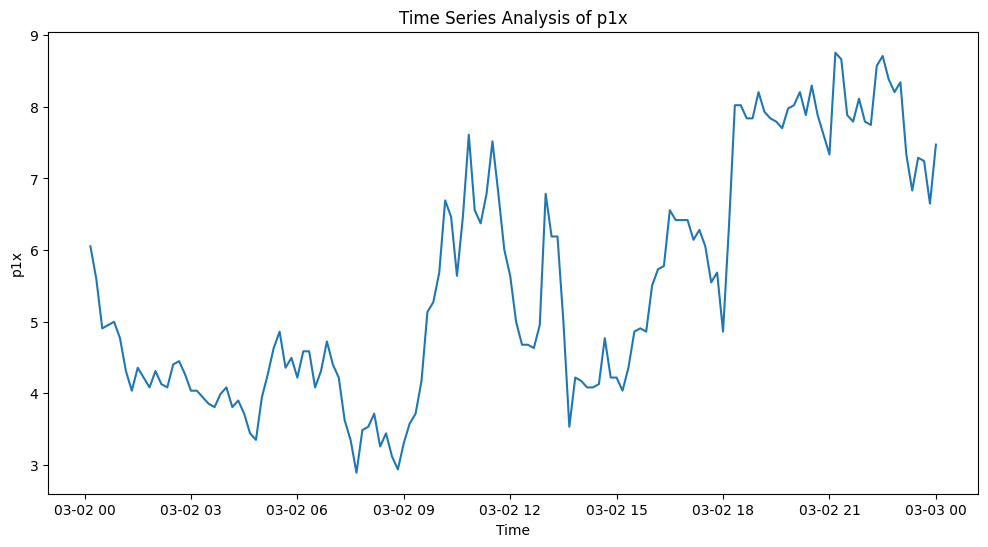

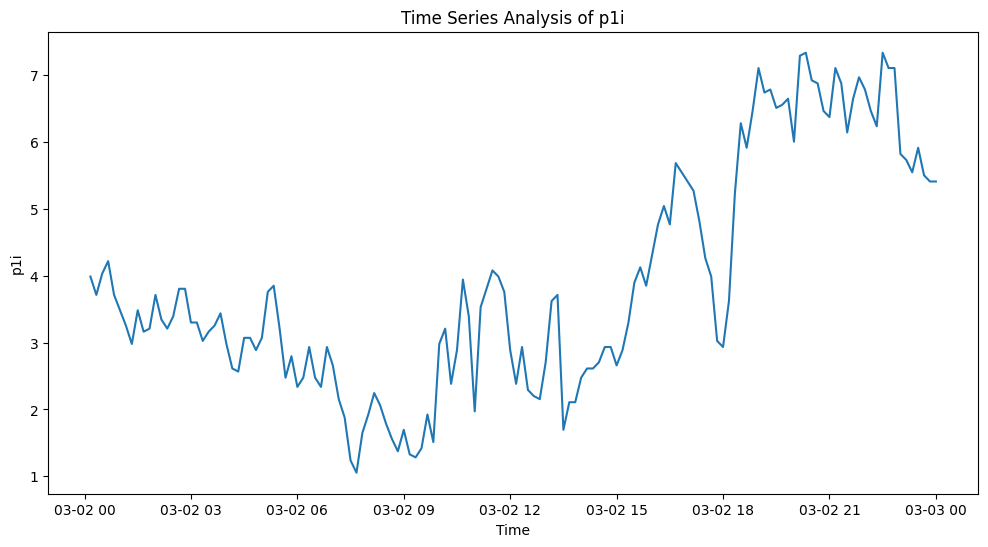

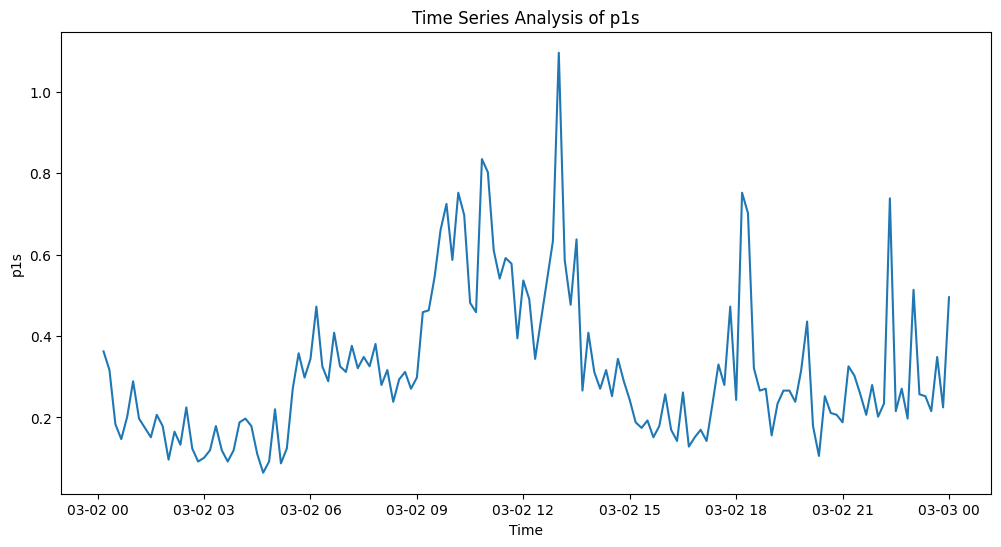

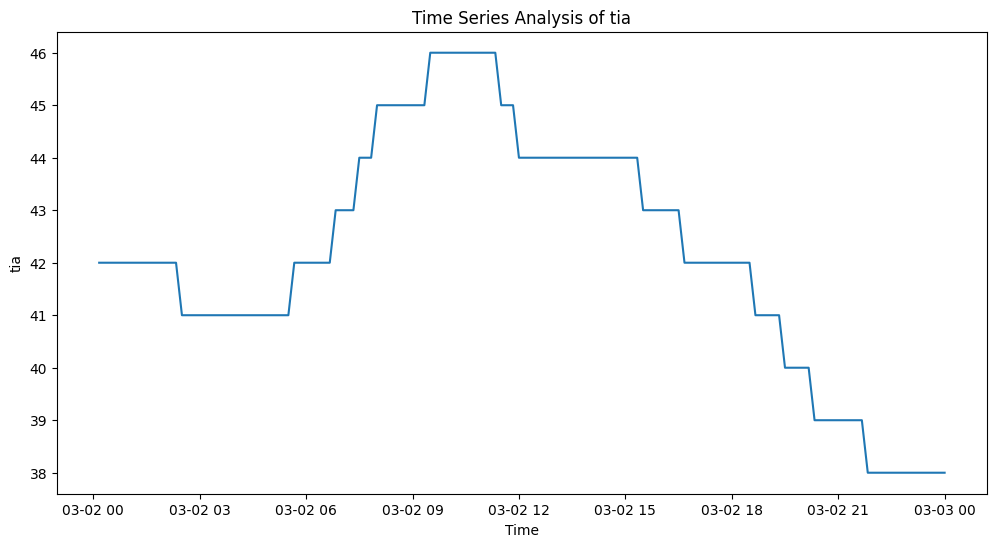

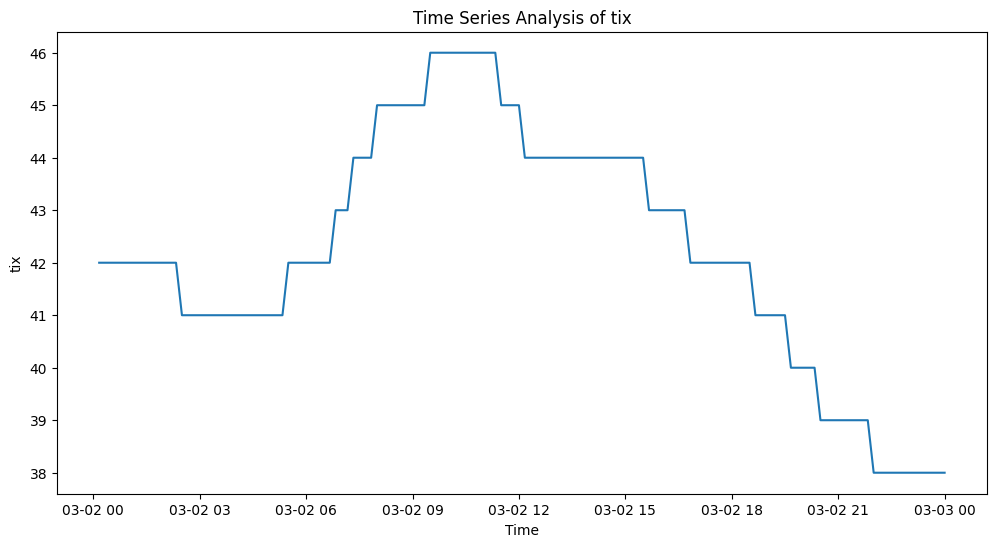

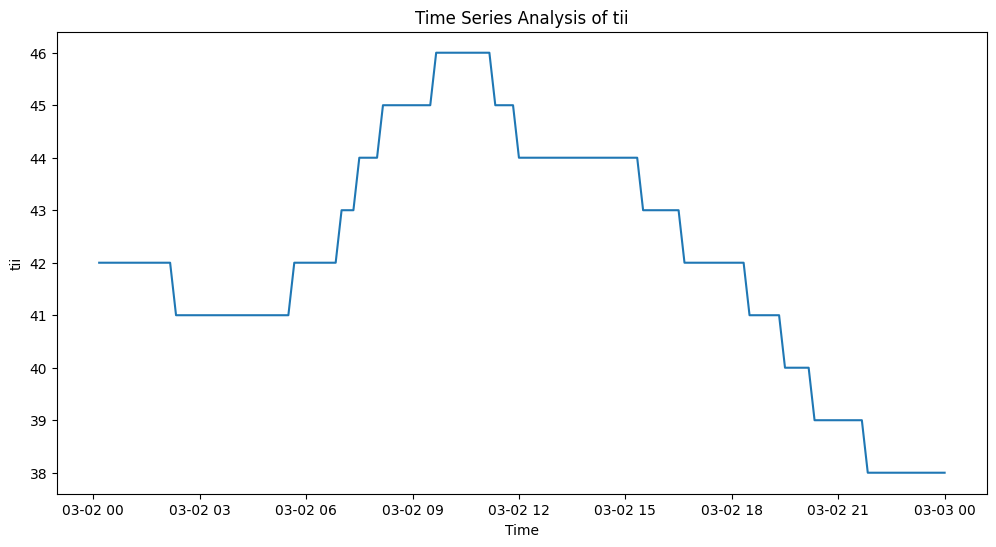

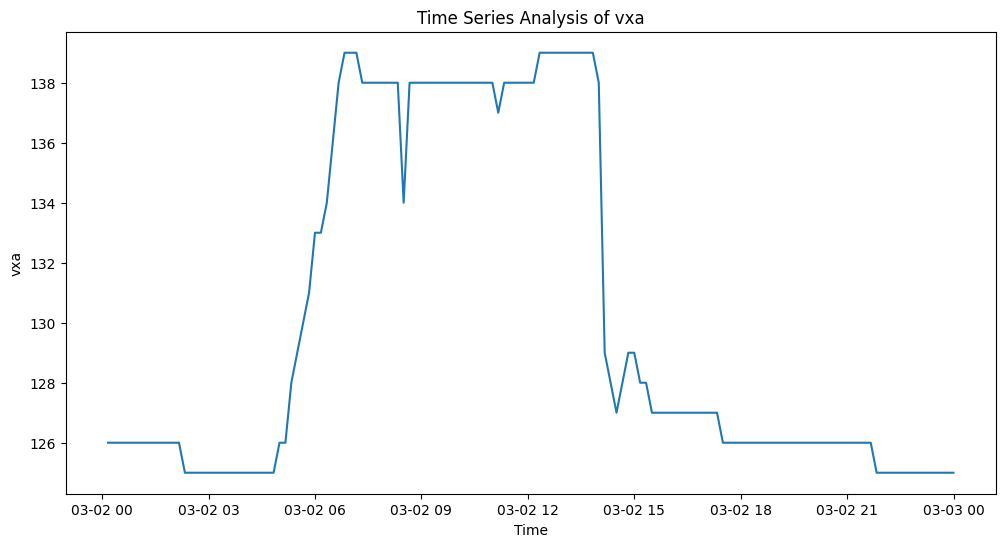

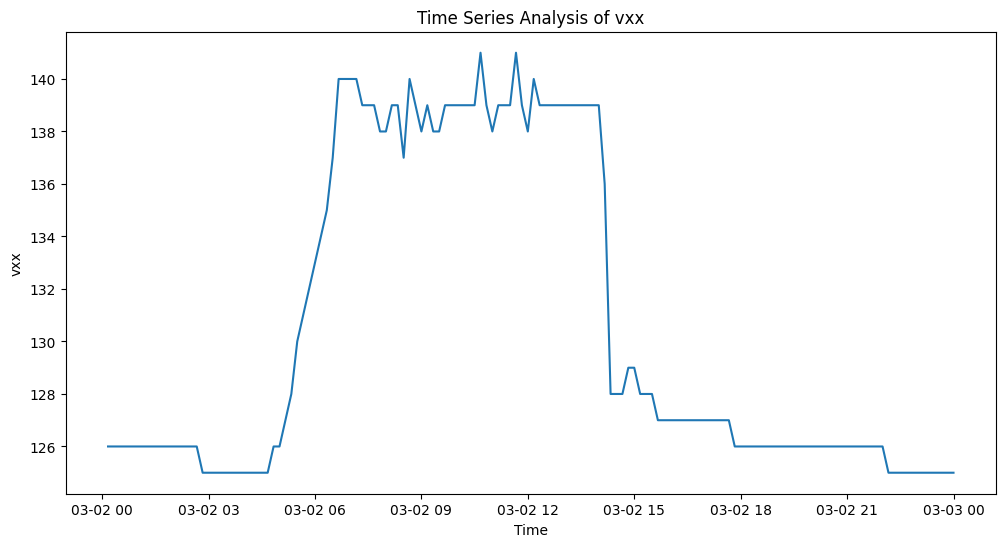

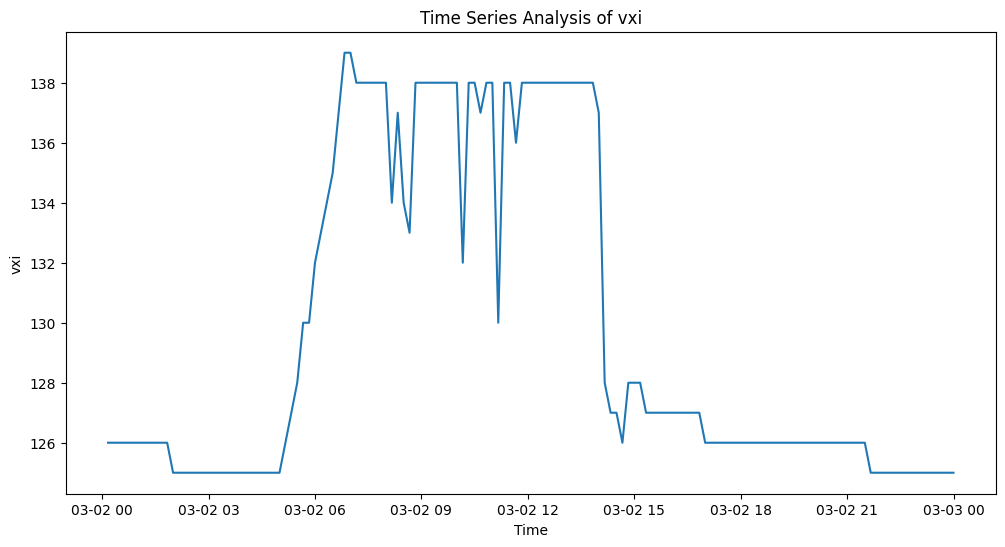

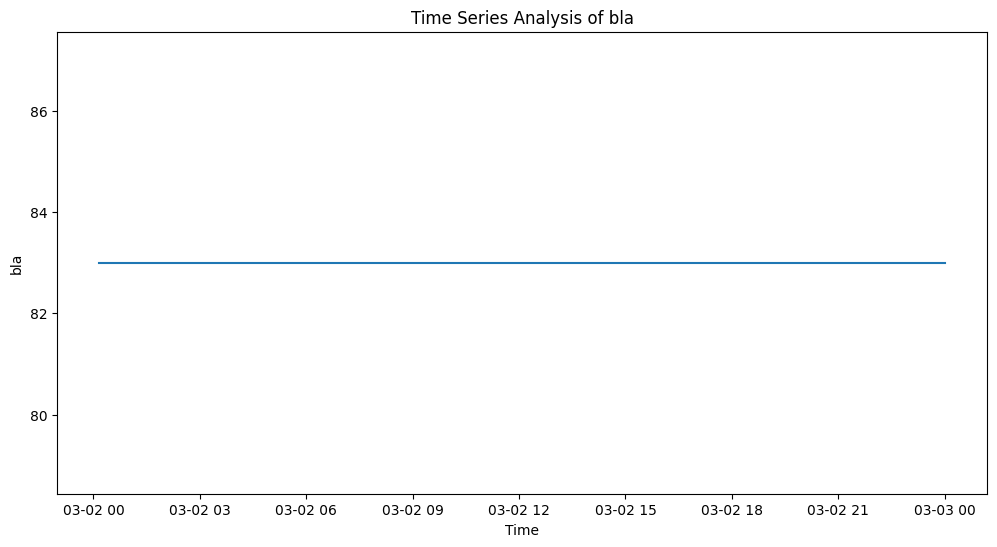

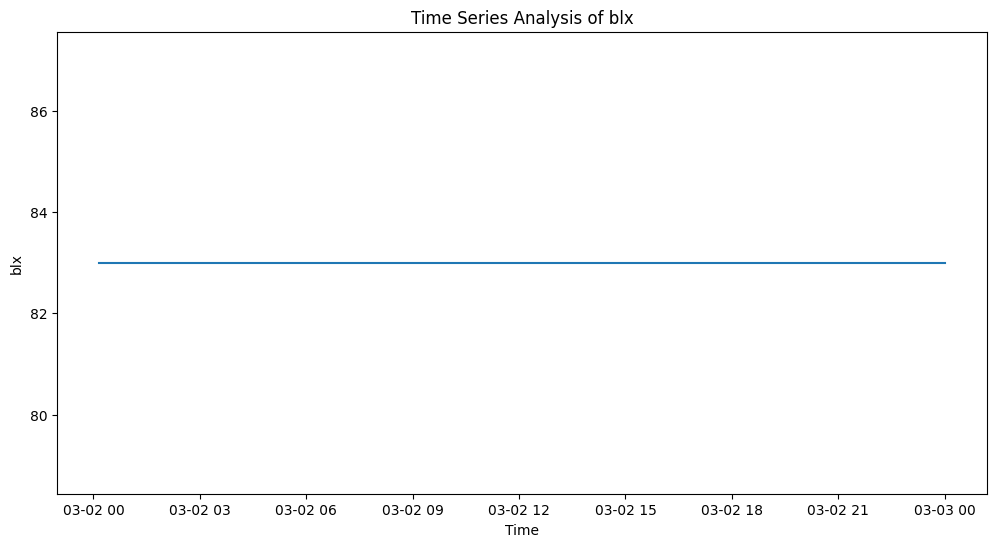

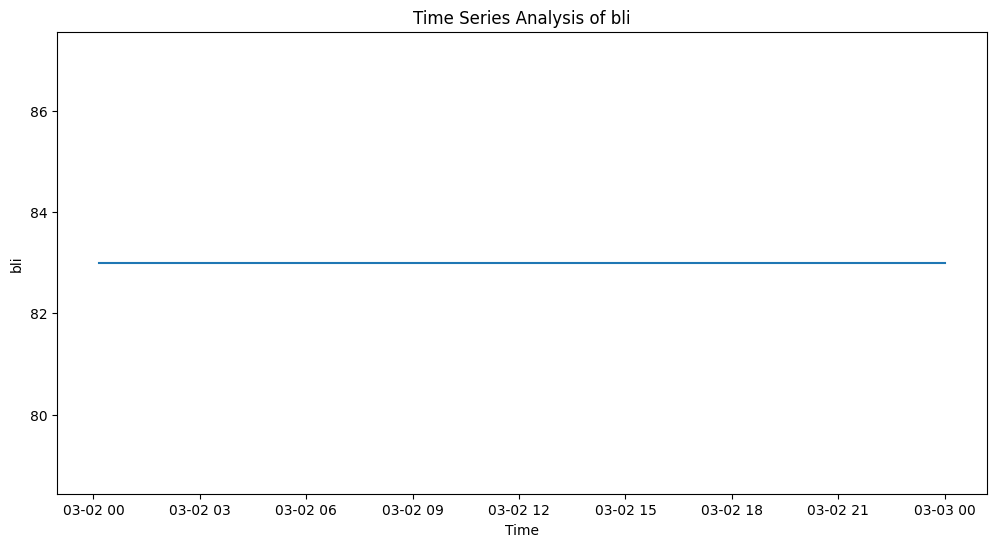

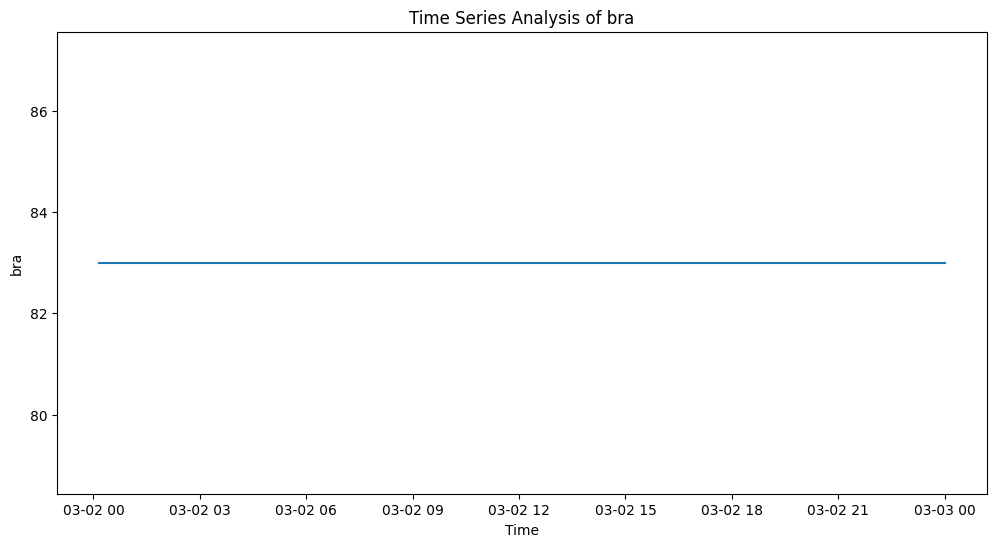

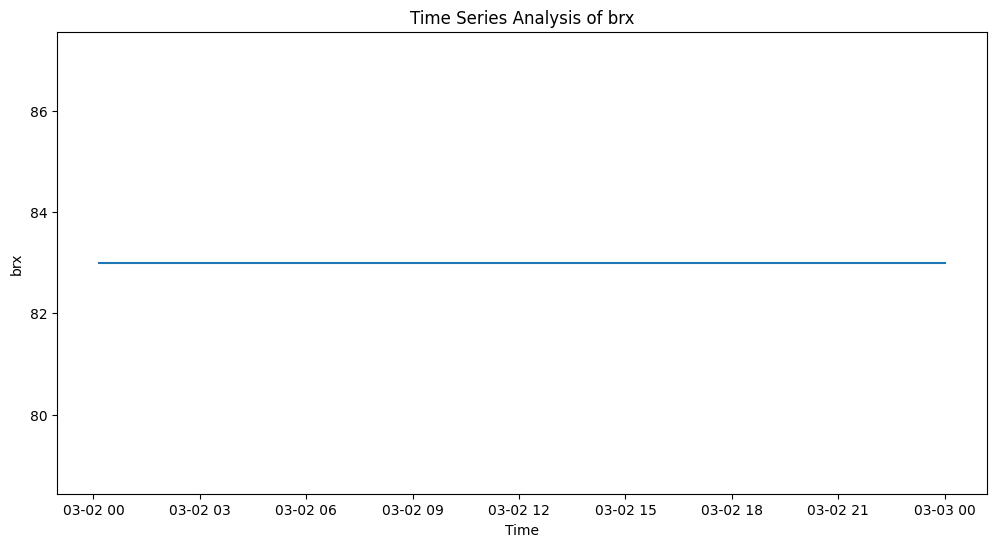

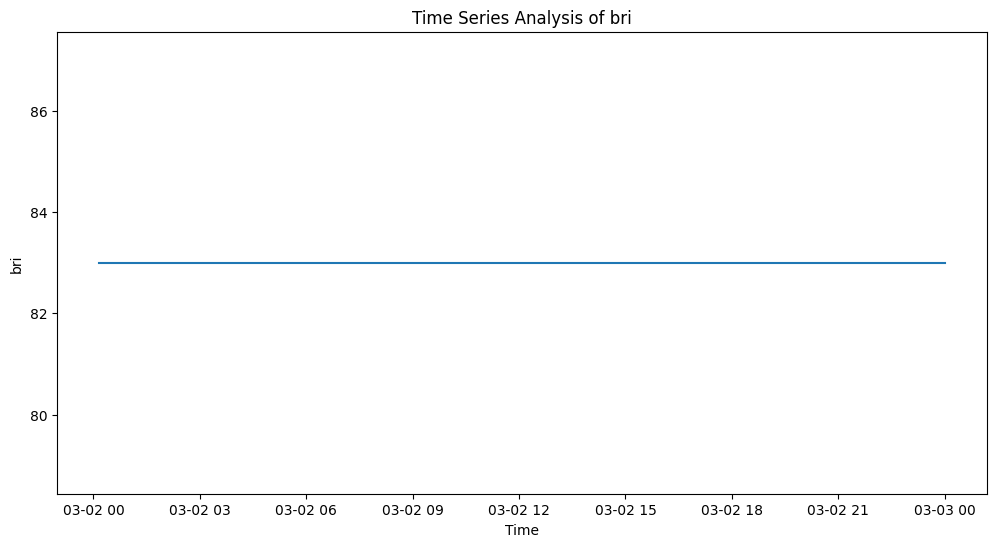

In [7]:
# Perform time series analysis for each column
for column in df.columns:
    if column not in ['date', 'time', 'period']:
        plt.figure(figsize=(12, 6))
        sns.lineplot(x=df.index, y=df[column])
        plt.title(f'Time Series Analysis of {column}')
        plt.xlabel('Time')
        plt.ylabel(column)
        plt.show()

In [8]:
# Exclude columns from correlation analysis
columns_to_exclude = ['datetime', 'date', 'time', 'period']
columns_for_correlation = [col for col in df.columns if col not in columns_to_exclude]

# Calculate correlation matrix
correlation_matrix = df[columns_for_correlation].corr()
#print(correlation_matrix)

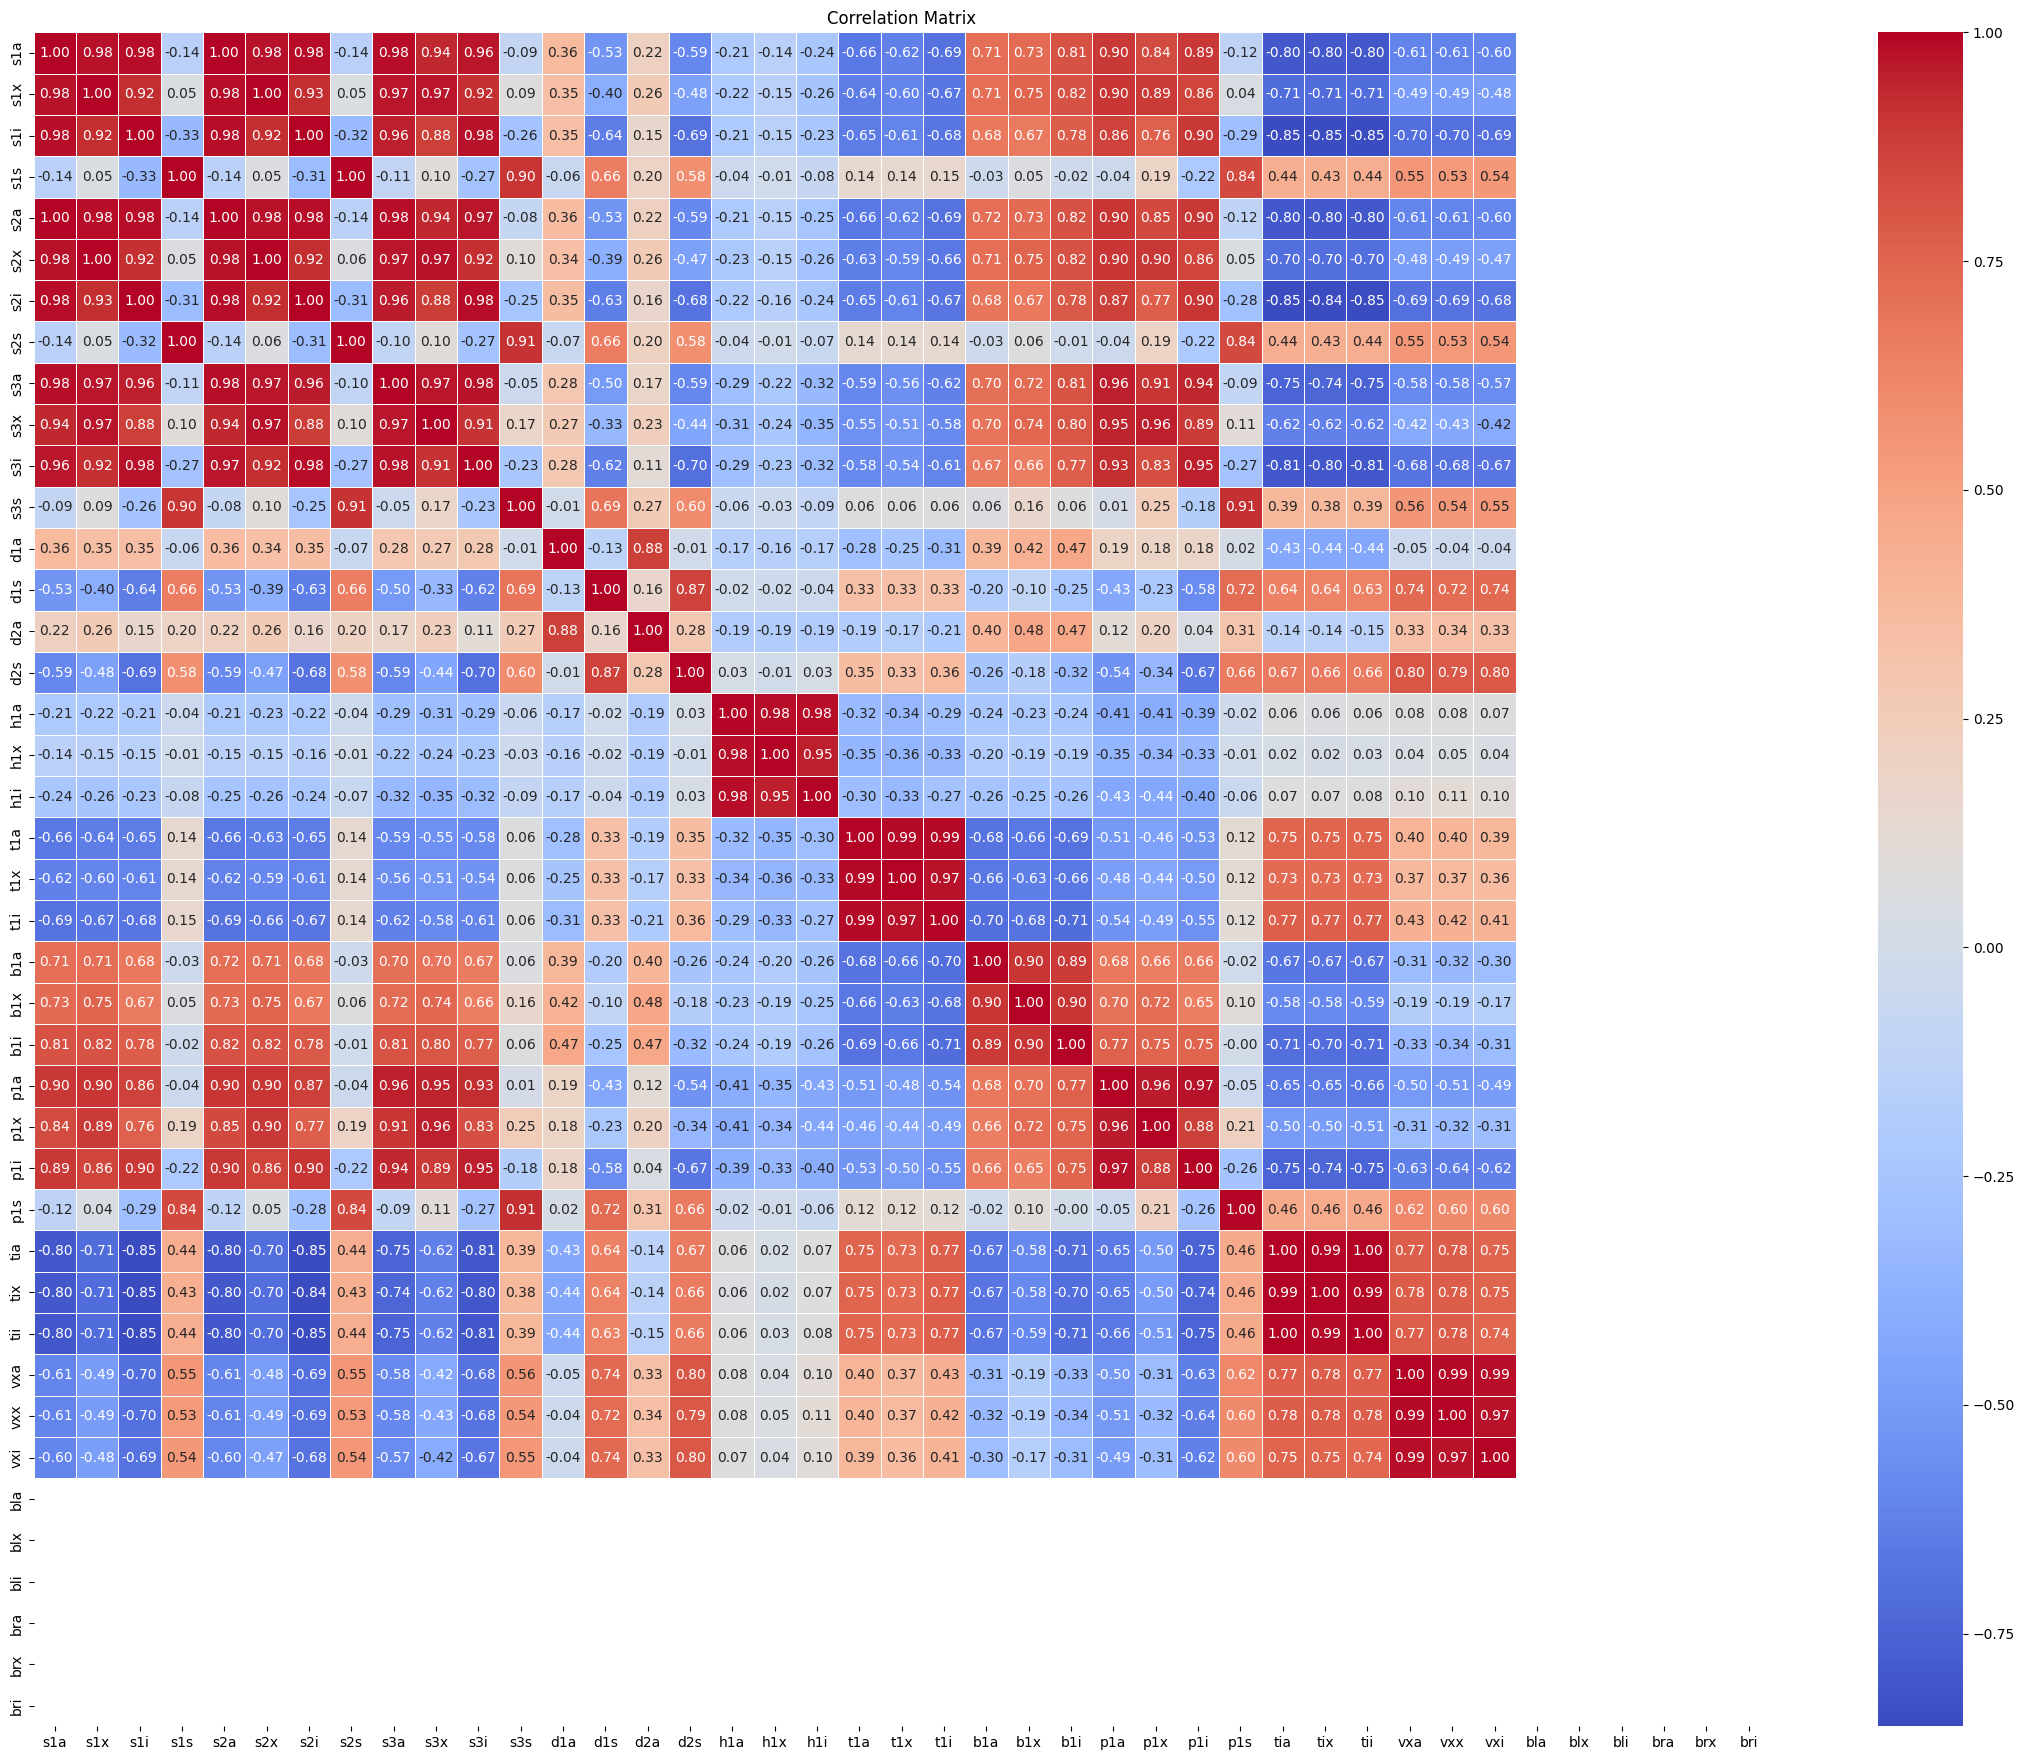

In [9]:
# Create a heatmap for the correlation matrix
#  The heatmap displays the correlation coefficients between different columns. 
# Positive values indicate a positive correlation, while negative values indicate a negative correlation. 
# Values closer to 1 or -1 indicate stronger correlations.
plt.figure(figsize=(28, 22))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

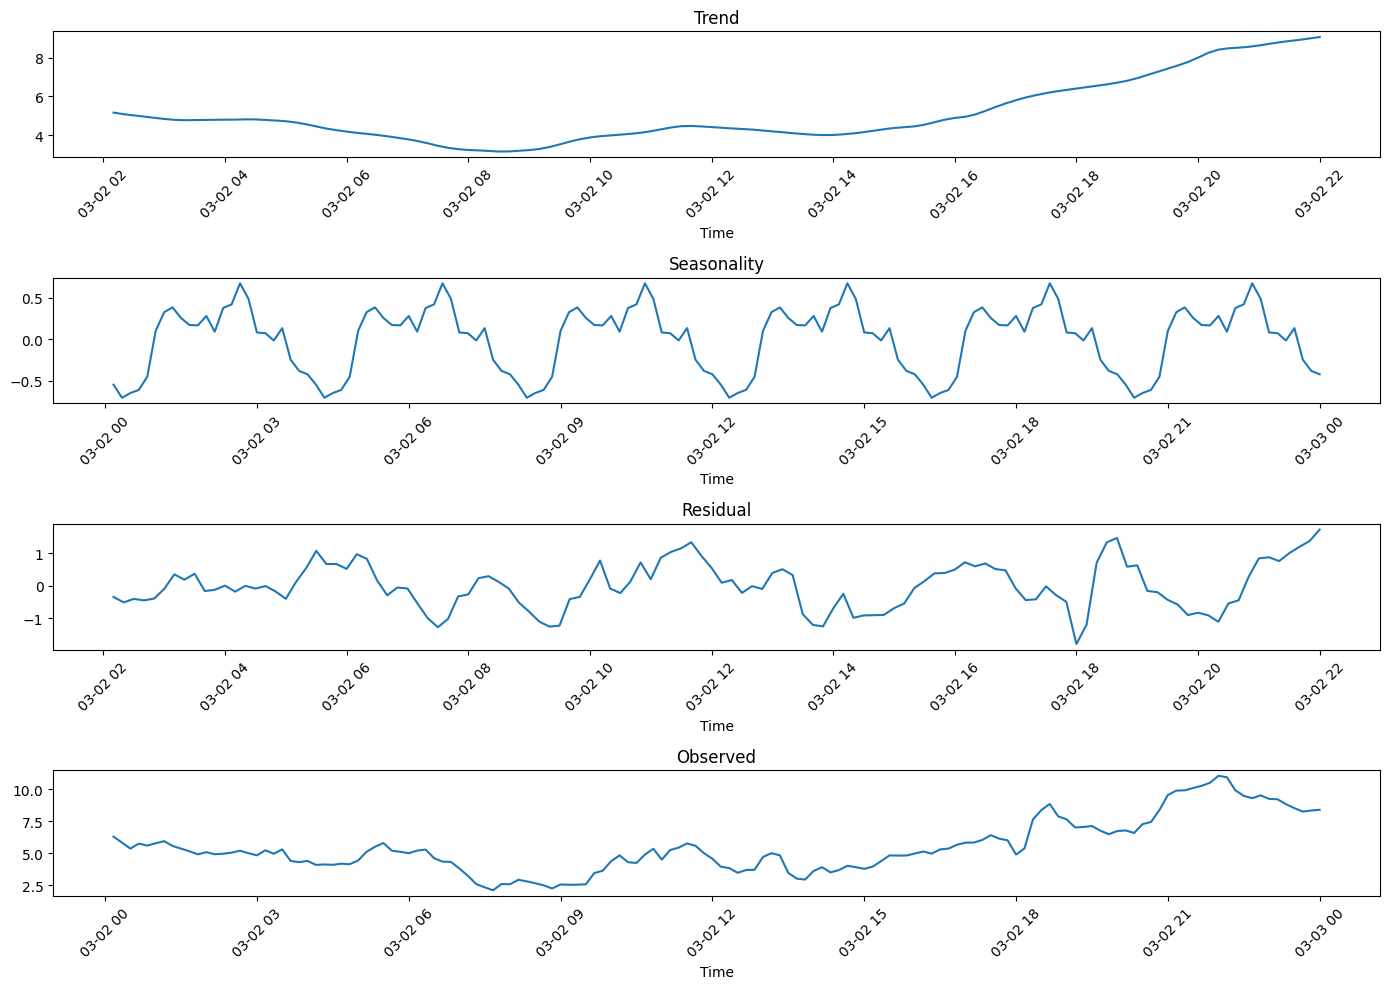

In [10]:
# Decompose the time series into trend, seasonality, and residual components
result = seasonal_decompose(df['s1a'], model='additive', period=24)  # Assuming seasonality is daily (24 hours)

# Increase figure size
plt.figure(figsize=(14, 10))

# Plot decomposed components
plt.subplot(4, 1, 1)
plt.plot(result.trend)
plt.title('Trend')
plt.xlabel('Time')
plt.xticks(rotation=45)

plt.subplot(4, 1, 2)
plt.plot(result.seasonal)
plt.title('Seasonality')
plt.xlabel('Time')
plt.xticks(rotation=45)

plt.subplot(4, 1, 3)
plt.plot(result.resid)
plt.title('Residual')
plt.xlabel('Time')
plt.xticks(rotation=45)

plt.subplot(4, 1, 4)
plt.plot(result.observed)
plt.title('Observed')
plt.xlabel('Time')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

/Users/mpillodi/anaconda3/envs/windanalysis/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  self._init_dates(dates, freq)
/Users/mpillodi/anaconda3/envs/windanalysis/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  self._init_dates(dates, freq)
/Users/mpillodi/anaconda3/envs/windanalysis/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


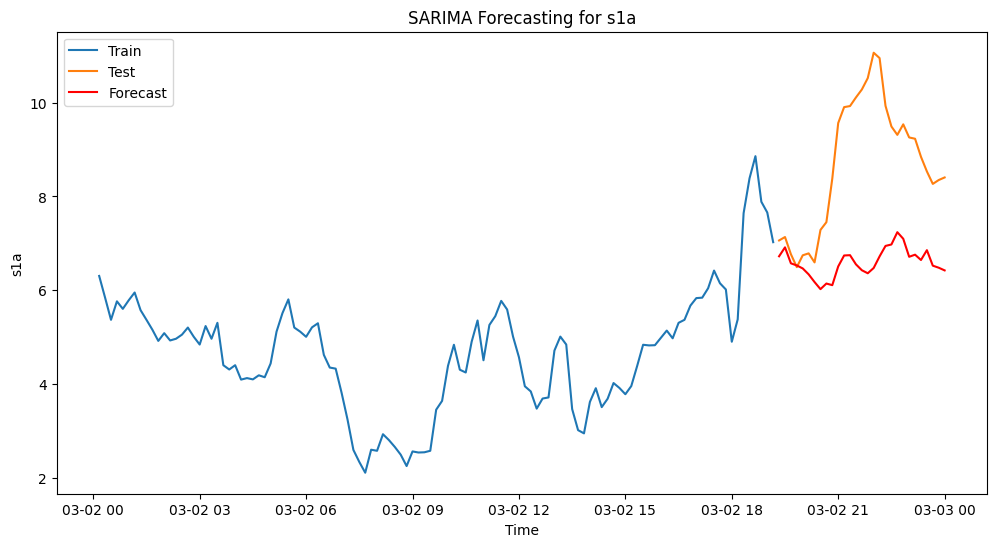

In [11]:
# Forecasting using SARIMA (Seasonal AutoRegressive Integrated Moving Average)
# Train-test split
train_size = int(len(df['s1a']) * 0.8)
train, test = df['s1a'][:train_size], df['s1a'][train_size:]

# Model fitting
model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 24))  # Adjust order and seasonal_order as needed
fit_model = model.fit(disp=False)

# Forecast
forecast = fit_model.get_forecast(steps=len(test))
predicted_values = forecast.predicted_mean

# Visualize
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, predicted_values, label='Forecast', color='red')
plt.title('SARIMA Forecasting for s1a')
plt.xlabel('Time')
plt.ylabel('s1a')
plt.legend()
plt.show()